In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dataset 

df = pd.read_csv(r'deliviries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [3]:
# description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

- info function gives us following insights about the data :
    - Above dataset has total of 36 columns.
    - There are 8 columns which are of the int datatype .
    - There are 25 columns which are of the object datatype .
    - There are 3 columns which are of the float datatype .
    - There are columns (extras_type, player_dismissed, dismissal_kind, fielder, city, player_of_the_match, winner, result_margin, target_runs, target_overs, method) which are having null values.

In [4]:
df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
dtype: int64

In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
df.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
count,2.609200e+05,260920.000000,260920,260920,260920.000000,260920.000000,260920,260920,260920,260920.000000,...,260920,260430,260920,256796.000000,260611.000000,260611.000000,260920,3646,260920,260920
unique,NaN,NaN,19,19,NaN,NaN,673,530,663,NaN,...,2,19,4,NaN,NaN,NaN,2,1,62,62
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,R Ashwin,V Kohli,NaN,...,field,Mumbai Indians,wickets,NaN,NaN,NaN,N,D/L,AK Chaudhary,S Ravi
freq,NaN,NaN,31437,31505,NaN,NaN,6236,4679,6067,NaN,...,167471,34629,135296,NaN,NaN,NaN,257286,3646,27353,19983
mean,9.070665e+05,1.483531,NaN,NaN,9.197677,3.624486,NaN,NaN,NaN,1.265001,...,NaN,NaN,NaN,17.279451,167.290406,19.846742,NaN,NaN,NaN,NaN
std,3.679913e+05,0.502643,NaN,NaN,5.683484,1.814920,NaN,NaN,NaN,1.639298,...,NaN,NaN,NaN,21.600307,32.165944,1.224266,NaN,NaN,NaN,NaN
min,3.359820e+05,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,43.000000,5.000000,NaN,NaN,NaN,NaN
25%,5.483340e+05,1.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,6.000000,148.000000,20.000000,NaN,NaN,NaN,NaN
50%,9.809670e+05,1.000000,NaN,NaN,9.000000,4.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,8.000000,167.000000,20.000000,NaN,NaN,NaN,NaN
75%,1.254066e+06,2.000000,NaN,NaN,14.000000,5.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,20.000000,188.000000,20.000000,NaN,NaN,NaN,NaN


In [7]:
# filling the missing values of the city column 
# first we have to see the venue corresponding to which the values are empty

city_miss=df[df.city.isnull()][['city','venue']]
city_miss.venue.unique()

# city = Nan when venue is Sharjah Cricket Stadium and Dubai International Cricket stadium
# So we can consider Sharjah Cricket Stadium = Sharjah city & Dubai International cricket stadium  = Dubai



array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [8]:
# To fill the respective city in the dataframe we have to make a function

def fill_city (row):
    if pd.isna(row['city']):
        if row['venue'] == 'Sharjah Cricket Stadium':
            return 'Sharjah'
        elif row['venue'] == 'Dubai International Cricket Stadium':
            return 'Dubai'
    return row['city']

df['city'] = df.apply(fill_city, axis=1)
df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
season                   0
city                     0
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
dtype: int64

In [9]:
! pip install ydata-profiling


Defaulting to user installation because normal site-packages is not writeable


In [10]:
# Player of the match also has null values so we see player of the match with respect to the match result column

df[df.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
57068,NaN,no result
57069,NaN,no result
57070,NaN,no result
57071,NaN,no result
57072,NaN,no result
...,...,...
236863,NaN,no result
236864,NaN,no result
236865,NaN,no result
236866,NaN,no result


This shows that when there is a match with no result (maay be abandoned) then there was no player_of_match which seems resonable.

In [11]:
df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

batting team, bowling team and winner column has rising pune supergaints as well as rising pune supergaint & also Royal challengers bangaluru has same problem 

In [12]:
df.winner = df.winner.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df.batting_team = df.batting_team.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df.bowling_team = df.bowling_team.replace('Rising Pune Supergiant','Rising Pune Supergiants')

df.winner = df.winner.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df.batting_team = df.batting_team.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df.bowling_team = df.bowling_team.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

df.batting_team.unique()


array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [13]:
city_venue = df.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                  6925
               Zayed Cricket Stadium, Abu Dhabi                      1874
Ahmedabad      Narendra Modi Stadium, Ahmedabad                      5660
               Sardar Patel Stadium, Motera                          2893
Bangalore      M Chinnaswamy Stadium                                14907
Bengaluru      M Chinnaswamy Stadium, Bengaluru                      3423
               M.Chinnaswamy Stadium                                 3494
Bloemfontein   OUTsurance Oval                                        500
Cape Town      Newlands                                              1539
Centurion      SuperSport Park                                       2866
Chandigarh     Punjab Cricket Association IS Bindra Stadium          2429
               Punjab Cricket Association IS Bindra Stadium, M...    2574
               Punjab Cricket Association IS Bindra Stadium, M...    1207
               Punjab Cricket Association Stadium, Mohali            8266
Chennai        MA Chidambaram Stadium                                2130
               MA Chidambaram Stadium, Chepauk                      11760
               MA Chidambaram Stadium, Chepauk, Chennai              6816
Cuttack        Barabati Stadium                                      1695
Delhi          Arun Jaitley Stadium                                  3356
               Arun Jaitley Stadium, Delhi                           3963
               Feroz Shah Kotla                                     13950
Dharamsala     Himachal Pradesh Cricket Association Stadium          2159
               Himachal Pradesh Cricket Association Stadium, D...     982
Dubai          Dubai International Cricket Stadium                  11229
Durban         Kingsmead                                             3643
East London    Buffalo Park                                           715
Guwahati       Barsapara Cricket Stadium, Guwahati                    739
Hyderabad      Rajiv Gandhi International Stadium                    3609
               Rajiv Gandhi International Stadium, Uppal            11604
               Rajiv Gandhi International Stadium, Uppal, Hyde...    3142
Indore         Holkar Cricket Stadium                                1965
Jaipur         Sawai Mansingh Stadium                               11150
               Sawai Mansingh Stadium, Jaipur                        2370
Johannesburg   New Wanderers Stadium                                 1940
Kanpur         Green Park                                             921
Kimberley      De Beers Diamond Oval                                  726
Kochi          Nehru Stadium                                         1155
Kolkata        Eden Gardens                                         17988
               Eden Gardens, Kolkata                                 3858
Lucknow        Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...    3283
Mohali         Maharaja Yadavindra Singh International Cricket...    1235
Mumbai         Brabourne Stadium                                     2469
               Brabourne Stadium, Mumbai                             4057
               Dr DY Patil Sports Academy                            3993
               Dr DY Patil Sports Academy, Mumbai                    2717
               Wankhede Stadium                                     17591
               Wankhede Stadium, Mumbai                             10915
Nagpur         Vidarbha Cricket Association Stadium, Jamtha           742
Navi Mumbai    Dr DY Patil Sports Academy, Mumbai                    2188
Port Elizabeth St George's Park                                      1677
Pune           Maharashtra Cricket Association Stadium               5294
               Maharashtra Cricket Association Stadium, Pune         3120
               Subrata Roy Sahara Stadium                            38

# - Observations: 
    - bengalore and bengaluru has same stadium but with different names sames goes with chandigrah , chennnai, delhi, dharamsahla, kolkata and many more.
    - Mumbai has 3 stadiums/venues while Pune and delhi has 2 different venues for the ipl

In [14]:
df.city = df.city.replace('Bangalore', 'Bengaluru')
df.venue = df.venue.replace(['M Chinnaswamy Stadium','M.Chinnaswamy Stadium'],'M Chinnaswamy Stadium, Bengaluru')
df.venue = df.venue.replace(['Punjab Cricket Association IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium, Mohali'],'Punjab Cricket Association IS Bindra Stadium, Mohali')
df.venue = df.venue.replace(['MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennai'],'MA Chidambaram Stadium, Chepauk')
df.venue = df.venue.replace('Arun Jaitley Stadium','Arun Jaitley Stadium, Delhi')
df.venue = df.venue.replace('Himachal Pradesh Cricket Association Stadium','Himachal Pradesh Cricket Association Stadium, Dharamsala')
df.venue = df.venue.replace(['Rajiv Gandhi International Stadium','Rajiv Gandhi International Stadium, Uppal'],'Rajiv Gandhi International Stadium, Uppal, Hyderabad')



In [15]:
df.venue = df.venue.replace('Sawai Mansingh Stadium','Sawai Mansingh Stadium, Jaipur')
df.venue = df.venue.replace('Eden Gardens','Eden Gardens, Kolkata')
df.venue = df.venue.replace(['Brabourne Stadium','Dr DY Patil Sports Academy','Wankhede Stadium'],['Brabourne Stadium, Mumbai','Dr DY Patil Sports Academy, Mumbai','Wankhede Stadium, Mumbai'])
df.venue = df.venue.replace('Maharashtra Cricket Association Stadium','Maharashtra Cricket Association Stadium, Pune')
df.venue = df.venue.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam')
df.city = df.city.replace('Chandigarh', 'Mohali')



In [16]:
city_venue = df.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                  6925
               Zayed Cricket Stadium, Abu Dhabi                      1874
Ahmedabad      Narendra Modi Stadium, Ahmedabad                      5660
               Sardar Patel Stadium, Motera                          2893
Bengaluru      M Chinnaswamy Stadium, Bengaluru                     21824
Bloemfontein   OUTsurance Oval                                        500
Cape Town      Newlands                                              1539
Centurion      SuperSport Park                                       2866
Chennai        MA Chidambaram Stadium, Chepauk                      20706
Cuttack        Barabati Stadium                                      1695
Delhi          Arun Jaitley Stadium, Delhi                           7319
               Feroz Shah Kotla                                     13950
Dharamsala     Himachal Pradesh Cricket Association Stadium, D...    3141
Dubai          Dubai International Cricket Stadium                  11229
Durban         Kingsmead                                             3643
East London    Buffalo Park                                           715
Guwahati       Barsapara Cricket Stadium, Guwahati                    739
Hyderabad      Rajiv Gandhi International Stadium, Uppal, Hyde...   18355
Indore         Holkar Cricket Stadium                                1965
Jaipur         Sawai Mansingh Stadium, Jaipur                       13520
Johannesburg   New Wanderers Stadium                                 1940
Kanpur         Green Park                                             921
Kimberley      De Beers Diamond Oval                                  726
Kochi          Nehru Stadium                                         1155
Kolkata        Eden Gardens, Kolkata                                21846
Lucknow        Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...    3283
Mohali         Maharaja Yadavindra Singh International Cricket...    1235
               Punjab Cricket Association IS Bindra Stadium, M...   14476
Mumbai         Brabourne Stadium, Mumbai                             6526
               Dr DY Patil Sports Academy, Mumbai                    6710
               Wankhede Stadium, Mumbai                             28506
Nagpur         Vidarbha Cricket Association Stadium, Jamtha           742
Navi Mumbai    Dr DY Patil Sports Academy, Mumbai                    2188
Port Elizabeth St George's Park                                      1677
Pune           Maharashtra Cricket Association Stadium, Pune         8414
               Subrata Roy Sahara Stadium                            3825
Raipur         Shaheed Veer Narayan Singh International Stadium      1431
Rajkot         Saurashtra Cricket Association Stadium                2381
Ranchi         JSCA International Stadium Complex                    1671
Sharjah        Sharjah Cricket Stadium                               6672
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    3537

In [17]:
# checking the number of cities and venues now

print(df.city.nunique())
print(df.venue.nunique())



34
40


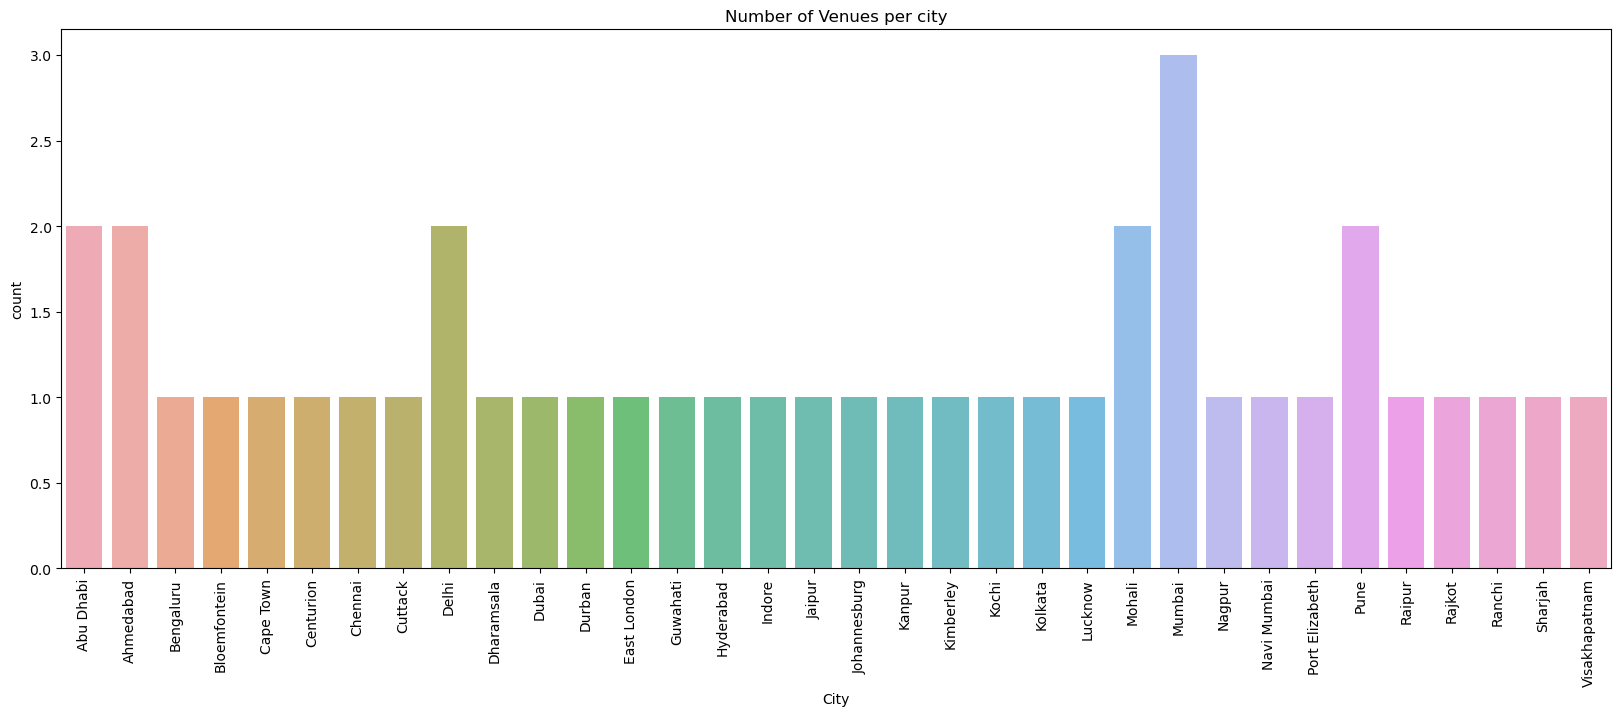

In [18]:
# Now we visualize the venue per city
v = pd.crosstab(df['city'],df['venue'])
# Changing the non zero values to 1
v[v!=0]=1
# adding a new column count which shows the sum of all the columns in a particular row
v['count'] = v.sum(axis= 'columns')
b = v['count']

# Plotting

plt.figure(figsize=(20,7))
sns.barplot(x = b.index, y= b.values , alpha = 0.8)
plt.title('Number of Venues per city')
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()


Now while reviewing pandasprofiling report of the dataset there are two columns team1 and team2 having same problem as batting_team and bowling_team so to deal with that we will follow the same approach

In [19]:
df.team1 = df.team1.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df.team2 = df.team2.replace('Rising Pune Supergiant','Rising Pune Supergiants')


df.team1 = df.team1.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df.team2 = df.team2.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df.team1.unique()

array(['Royal Challengers Bengaluru', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

# A.  EDA 
 **Exploratory Data Analysis (EDA) is approach to analyzing datasets to summarize their main characterstics, often with visual methods.**
 - Here we will first start by analysing individual columns that is do univariate analysis and then move on to bivariate and multivariate analysis. In the course of this we will try to answer few questions that will tell us more about each venue, toss winner, individual players, umpires, etc.

# A.1 Unidimensional analysis
- we start with the unidimensional analysis first

**A.1.1 How many matches were played each season**

In [20]:
df.season = df.season.replace(['2007/08','2009', '2009/10', '2011', '2018', '2019', '2020/21', '2021'], [2008 , 2009, 2010, 2011, 2018, 2019, 2020, 2021])
df.season.unique()


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [21]:
mat_count = df[['match_id','season']]
mat_count.match_id = mat_count.match_id.drop_duplicates()
mat_count.dropna(inplace=True)
mat_count.reset_index(drop=True)
mat_count['season'].value_counts()


season
2013    76
2023    74
2012    74
2022    74
2011    73
2024    71
2018    60
2021    60
2020    60
2019    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

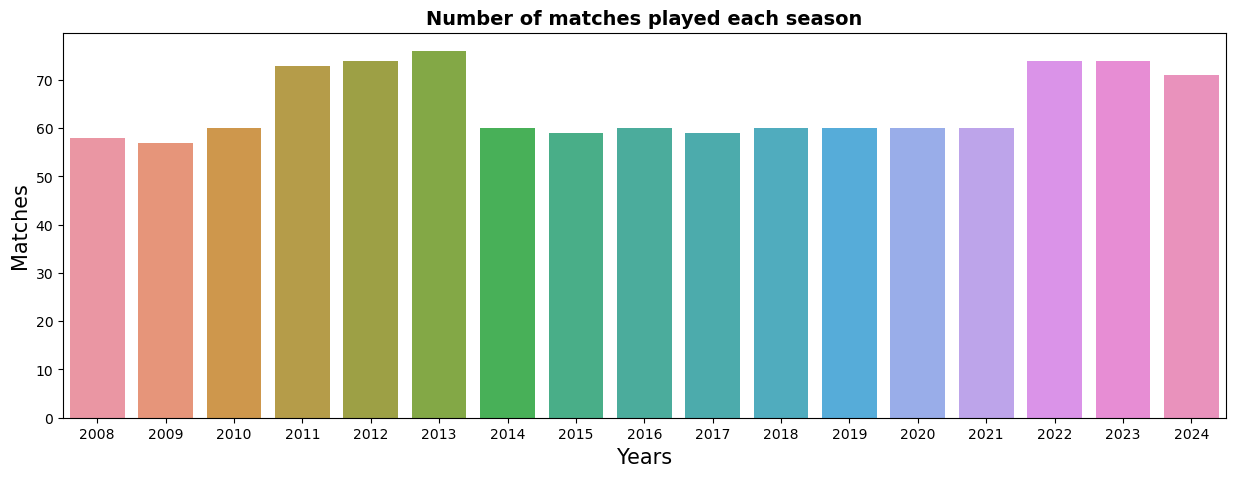

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='season',data=mat_count)
plt.title('Number of matches played each season', fontsize = 14, fontweight = 'bold')
plt.xlabel('Years', size = 15)
plt.ylabel('Matches', size = 15)
plt.show()

- The season with the most number of matches played is 2013, with 76 matches.
- The seasons with the second-most number of matches played are 2023, 2022, and 2012, each with 74 matches.
- The season with the least number of matches played is 2009, with only 57 matches played.
- So, let's find the reason why ??

**A.1.2 how the number of matches differ each season**

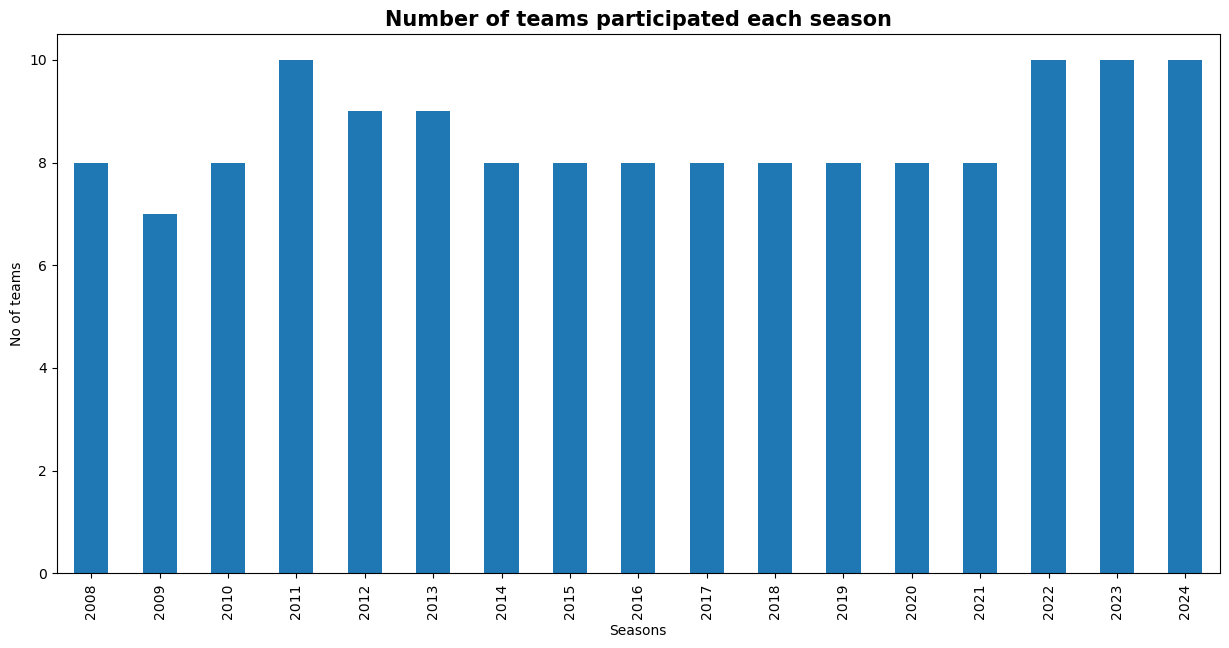

In [23]:
df.groupby('season')['team1'].nunique().plot(kind='bar', figsize=(15,7))
plt.title('Number of teams participated each season' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('Seasons' , fontsize = 10)
plt.ylabel('No of teams', fontsize = 10)
plt.xticks(rotation= 90)
plt.show()

- 10 teams played in the year 2011, 2022, 2023 & 2024 and 9 teams played in the year 2012 and 2013.
- This explains why the number of matches increases in years 2011-2013 and 2022-2024.

**A.1.3 Which team has dominated IPL so far**

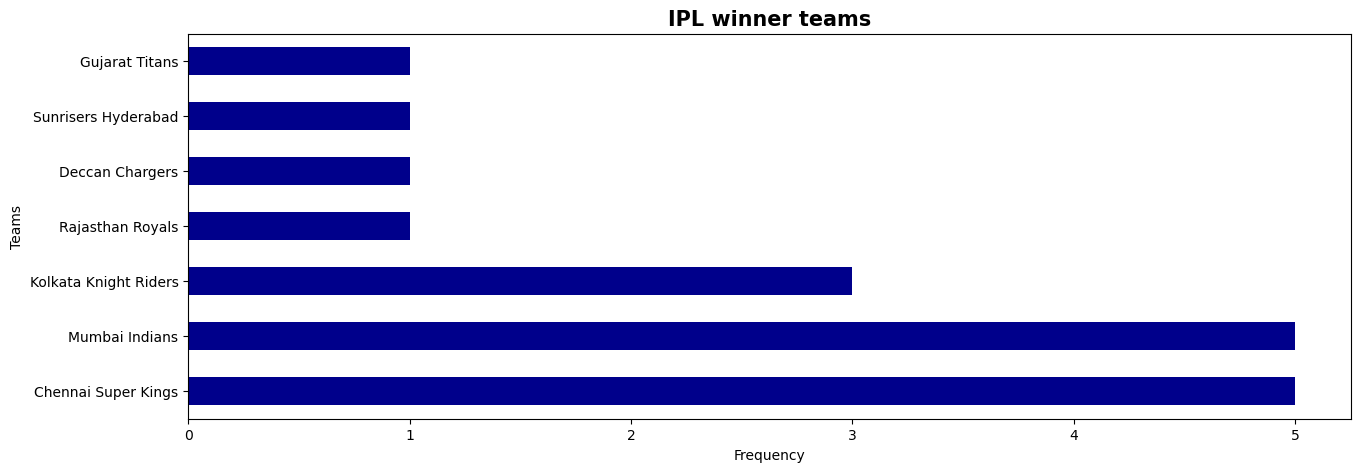

In [24]:
winning_teams = df[['season','winner','match_type']]
winning_teams.drop_duplicates(inplace=True)
winning_teams.reset_index(drop=True, inplace=True)
# Here we have to filter only the teams who has won matches in the final 
final_winner = winning_teams[winning_teams['match_type']=='Final']
final_winner.winner.value_counts().plot(kind='barh', figsize=(15,5), color= 'darkblue')
plt.title('IPL winner teams' , fontsize= 15 , fontweight = 'bold')
plt.xlabel('Frequency' , fontsize = 10)
plt.ylabel('Teams' , fontsize = 10)

plt.show()


- CSK & MI have won the IPL 5 times and dominated the league till now.
- The latest edition of the IPL has won by KKR which makes their title count 3.
- RR has only able to won 1 time which was the first edition of the IPL(2008)

**A.1.4 Venue which has hosted the most number of matches**

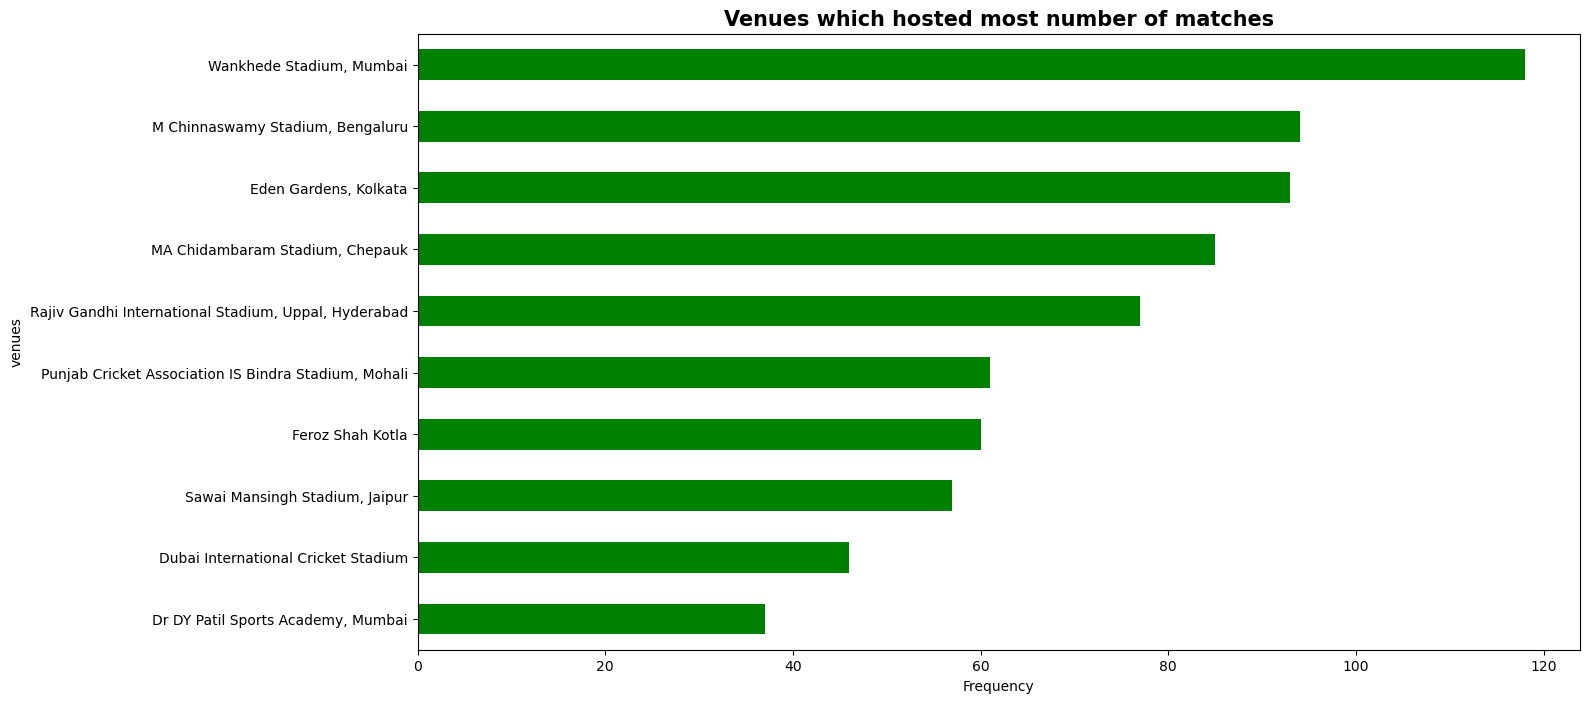

In [25]:
venues = df[['venue','match_id']]
venues['match_id'] = venues['match_id'].drop_duplicates()
venues.dropna(inplace=True)
venues.venue.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(15,8), color= 'green')
plt.title('Venues which hosted most number of matches' , fontsize= 15 , fontweight = 'bold')
plt.xlabel('Frequency' , fontsize = 10)
plt.ylabel('venues' , fontsize = 10)
plt.show()

- Wankhede Stadium , Mumbai has hosted most number of matches so far followed by M chinnaswamy Stadium, Bengaluru.

- Now we will take look at MoM player's stats and their performance in different conditions i call this module A.2

**A.2.1 Which player's performance has lead their team to win matches**

In [26]:
MoM = df[['match_id','player_of_match']]
MoM['match_id'] = MoM['match_id'].drop_duplicates().dropna()
MoM.dropna(inplace=True)
MoM = pd.DataFrame(MoM.player_of_match.value_counts())
MoM = MoM.reset_index()
MoM.columns = ['Player', 'Count']

MoM


,Player,Count
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
...,...,...
286,NV Ojha,1
287,KV Sharma,1
288,Washington Sundar,1
289,PD Collingwood,1


In [27]:
# Visualization using plotly

import plotly.express as px 
fig = px.bar(MoM.head(10), x='Player', y='Count')
fig.update_layout(title='Most Valuable Players',
                  xaxis_title='Player',
                  yaxis_title='Count')

fig.show()

**Observations**
- AB deVillers(25) has won most nuber of MoM followed by CH gayle(22).
- Most of the MoM are won by batters only.

**A.2.2 Has ABD won MoM consistently across all the venue or he performed well on a particular venue.**

In [28]:
Abd = df[df['player_of_match']== 'AB de Villiers'][['match_id','season','venue', 'city']]
Abd['match_id'] = Abd['match_id'].drop_duplicates()
Abd.dropna(inplace=True)
Abd = Abd.venue.value_counts()
Abd = Abd.reset_index()
Abd.columns = ['venue','count']
Abd

,venue,count
0,"M Chinnaswamy Stadium, Bengaluru",9
1,"Maharashtra Cricket Association Stadium, Pune",2
2,Dubai International Cricket Stadium,2
3,Kingsmead,1
4,OUTsurance Oval,1
5,Nehru Stadium,1
6,"Sawai Mansingh Stadium, Jaipur",1
7,Subrata Roy Sahara Stadium,1
8,JSCA International Stadium Complex,1
9,"Wankhede Stadium, Mumbai",1


In [29]:
fig = px.bar(Abd , x='venue' ,y='count', color_discrete_sequence=['teal'])
fig.update_layout(title = 'Abd MoM across venues', xaxis_title = 'Venues', yaxis_title = 'Frequency')
fig.show()

**Observations** :
- AB de villiers has won most MoM on M chinnaswamy Stadium , Bengaluru.
- Reason for this could be because he has played most matches for RCB.

**A.2.3 How many runs ABD scored in MoM matches**

In [30]:
ab_runs = df[df['player_of_match']== 'AB de Villiers'][['match_id','batter','batsman_runs', 'team1', 'team2', 'winner']]
ab_runs = ab_runs[ab_runs['batter']== 'AB de Villiers']
ab_runs_grouped = ab_runs.groupby('match_id')['batsman_runs'].sum()
ab_runs_grouped = pd.DataFrame(ab_runs_grouped)
ab_runs_grouped.reset_index(inplace=True)
ab_runs_grouped = ab_runs_grouped.rename(columns={'batsman_runs': 'total_runs'})
ab_runs_grouped
merge_data = pd.merge(ab_runs , ab_runs_grouped , on='match_id')
merge_data['match_id'] = merge_data['match_id'].drop_duplicates()
merge_data = merge_data.dropna()
merge_data

,match_id,batter,batsman_runs,team1,team2,winner,total_runs
0,392189.0,AB de Villiers,1,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,105
54,392230.0,AB de Villiers,0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,79
109,501200.0,AB de Villiers,0,Kochi Tuskers Kerala,Royal Challengers Bengaluru,Royal Challengers Bengaluru,54
150,548310.0,AB de Villiers,2,Royal Challengers Bengaluru,Delhi Daredevils,Royal Challengers Bengaluru,64
192,548336.0,AB de Villiers,3,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,59
216,548356.0,AB de Villiers,1,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,47
233,598042.0,AB de Villiers,0,Pune Warriors,Royal Challengers Bengaluru,Royal Challengers Bengaluru,50
256,733977.0,AB de Villiers,0,Royal Challengers Bengaluru,Sunrisers Hyderabad,Royal Challengers Bengaluru,89
299,734013.0,AB de Villiers,0,Chennai Super Kings,Royal Challengers Bengaluru,Royal Challengers Bengaluru,28
314,829795.0,AB de Villiers,0,Mumbai Indians,Royal Challengers Bengaluru,Royal Challengers Bengaluru,133


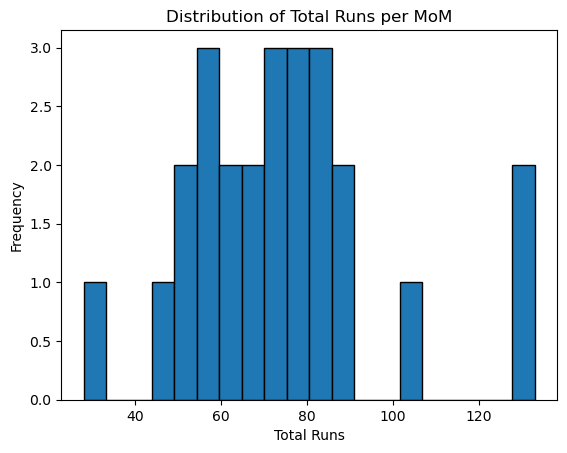

In [31]:
plt.hist(merge_data['total_runs'], bins=20, edgecolor='black')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Total Runs per MoM')
plt.show()

**Observations**:
- ABD has scored 3 centuries & 20 half-centuries in the total of his 25 MoM matches.

# A.3.1
**Umpires who has appeared in most number of the matches** 

In [32]:
umpire = df[['match_id', 'umpire1', 'umpire2']]
umpire['match_id'] = umpire['match_id'].drop_duplicates()
umpire.dropna(inplace=True)
umpire_total = pd.concat([umpire['umpire1'], umpire['umpire2']], ignore_index= True)
umpire_total = pd.DataFrame(umpire_total , columns= ['umpire_name'])
umpire_total['umpire_name'].value_counts()

umpire_name
S Ravi             131
AK Chaudhary       131
Nitin Menon        104
HDPK Dharmasena     98
C Shamshuddin       88
                  ... 
TH Wijewardene       5
K Bharatan           3
AG Wharf             2
SD Ranade            2
Subroto Das          1
Name: count, Length: 70, dtype: int64

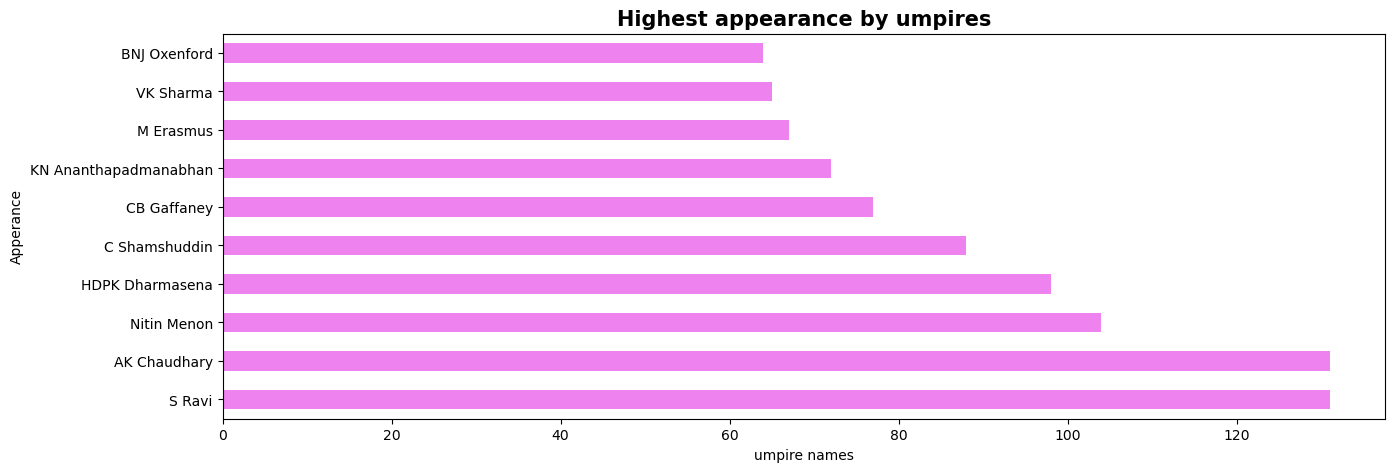

In [33]:
umpire_total['umpire_name'].value_counts().head(10).plot(kind='barh' , figsize = (15,5), color = 'violet')
plt.title('Highest appearance by umpires', fontsize = 15 , fontweight = 'bold')
plt.xlabel('umpire names', fontsize = 10)
plt.ylabel('Apperance' , fontsize = 10)
plt.show()

- S ravi & AK chaudary has most number of appearances in the IPL till now 131.
- Nitin Menon comes 2nd with 104 followed by Dharamsena 98.

**A.3.2 Relationship between Umpires and Finals**

In [34]:
final_umpires = df[['match_id', 'match_type' ,'umpire1', 'umpire2']]
final_umpires['match_id']=final_umpires['match_id'].drop_duplicates()
final_umpires.dropna(inplace=True)
final_umpires = final_umpires[final_umpires['match_type']== 'Final']
final_umpires = pd.concat([final_umpires['umpire1'],final_umpires['umpire2']],ignore_index=True)
final_umpires.value_counts()

Nitin Menon        6
SJA Taufel         5
HDPK Dharmasena    4
RE Koertzen        3
BF Bowden          2
CB Gaffaney        2
BNJ Oxenford       2
RK Illingworth     2
S Ravi             2
Asad Rauf          1
NJ Llong           1
M Erasmus          1
IJ Gould           1
J Madanagopal      1
RJ Tucker          1
Name: count, dtype: int64

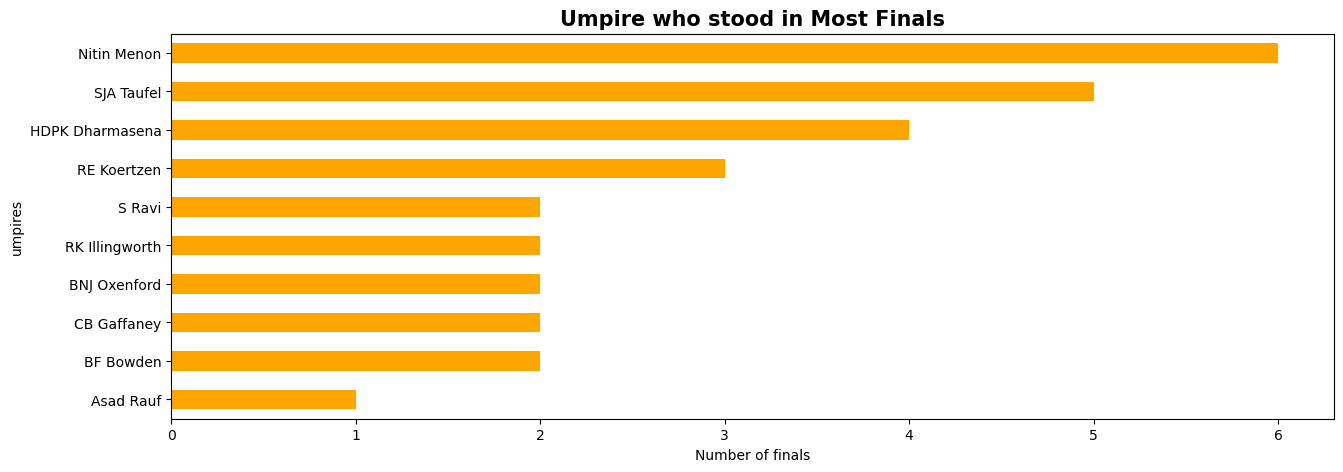

In [35]:
# Visualization
final_umpires.value_counts().head(10).sort_values(ascending=True).plot(kind= 'barh', figsize= (15,5), color = 'orange')
plt.title('Umpire who stood in Most Finals' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('Number of finals' , fontsize = 10)
plt.ylabel('umpires', fontsize = 10)
plt.show()


- Nitin Menon has stood in most final matches (6) followed by Simon Taufel (5).

**A.3.3 Do teams bat first or bowl after winning the toss**

In [36]:
toss = df[['match_id', 'toss_decision']]
toss['match_id'] = toss['match_id'].drop_duplicates()
toss.dropna(inplace=True)
toss['toss_decision'].value_counts()/len(toss['match_id'])*100

toss_decision
field    64.292237
bat      35.707763
Name: count, dtype: float64

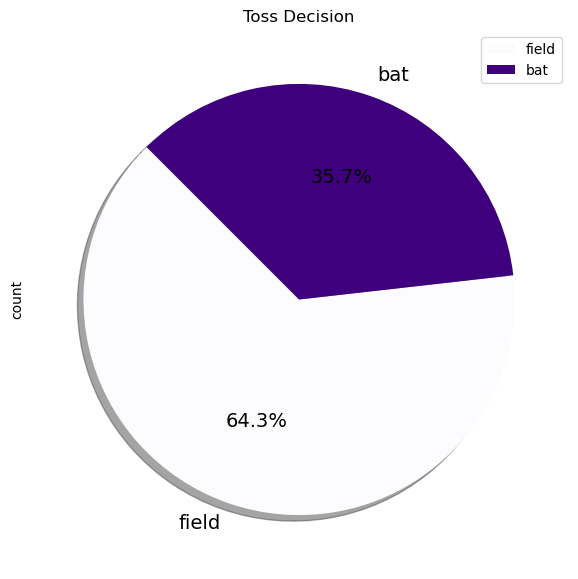

In [37]:
toss['toss_decision'].value_counts().plot(kind= 'pie' , fontsize= 14 , autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Purples')
plt.title('Toss Decision', fontsize= 12 )
plt.show()

**A.3.4 Do teams won more batting first or batting secound?**

In [38]:
def filter_match_id(row):
    row['match_id'] = row['match_id'].drop_duplicates()
    row.dropna(inplace=True)
    return row
# first we take the columns from main dataframe like match_id and result 
tie_noresult = df[['match_id','result']]
# As we are working on the per delivery bowled in IPL so we need to take only unique match_id below function just does that
filter_match_id(tie_noresult)
tie_noresult
# Here we have to create two new columns win_by_runs and win_by_wickets 
tie_noresult['win_by_runs'] = tie_noresult['result'].apply(lambda x : 1 if x == 'runs' else 0)
tie_noresult['win_by_wickets']  = tie_noresult['result'].apply(lambda x : 1 if x == 'wickets' else 0)
tie_noresult

# There are values where both the new columns values are zero that can happen if the match got tied or have no result so, we have to drop those rows 

tie_noresult = tie_noresult.query('~(win_by_runs==0 & win_by_wickets == 0)')
tie_noresult

tie_noresult['win_batting_first'] = np.where((tie_noresult['win_by_runs']>0), 'Yes', 'No')
tie_noresult.win_batting_first.value_counts()/len(tie_noresult['match_id'])*100

win_batting_first
No     53.717472
Yes    46.282528
Name: count, dtype: float64

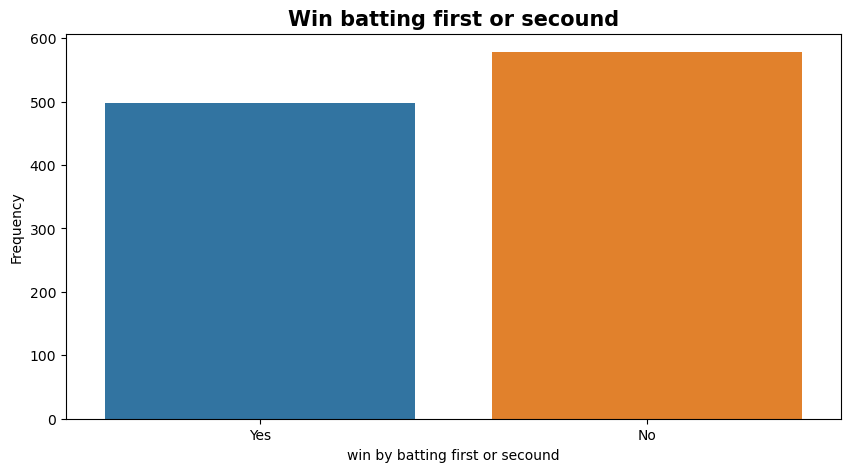

In [39]:
# visualization 
plt.figure(figsize=(10,5))
sns.countplot(x = 'win_batting_first', data= tie_noresult)
plt.title('Win batting first or secound' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('win by batting first or secound', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

- Teams who has chased down the target have won 53.7 %.

**A.3.5 Does winning toss help in winning the match**

In [40]:
toss_w = df[['match_id', 'toss_winner' , 'winner', 'toss_decision', 'venue', 'season']]
filter_match_id(toss_w)
toss_w['toss_w_match_w'] = np.where((toss_w['toss_winner']==toss_w['winner']), 'Yes', 'No')
toss_w['toss_w_match_w'].value_counts()/len(toss_w['match_id'])*100

toss_w_match_w
No     54.862385
Yes    45.137615
Name: count, dtype: float64

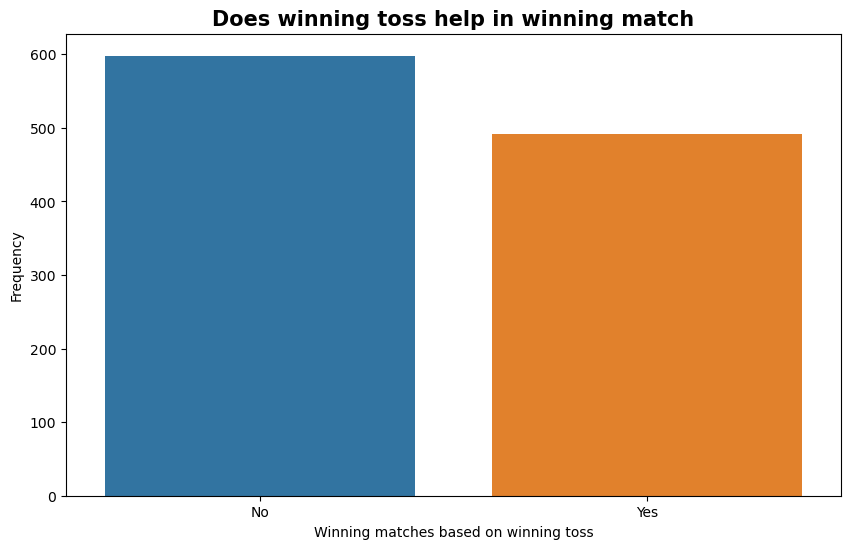

In [41]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x = 'toss_w_match_w' , data= toss_w)
plt.title('Does winning toss help in winning match', fontsize = 15 , fontweight = 'bold')
plt.xlabel('Winning matches based on winning toss', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

- By analysis it can be seen that winning toss does not favour winning match that much as both are 50.3 % & 49.6%.

# Bivariate Analysis 
- Going to call this module B.

**B.1.1 Which team bat first or bowl first after winning toss**

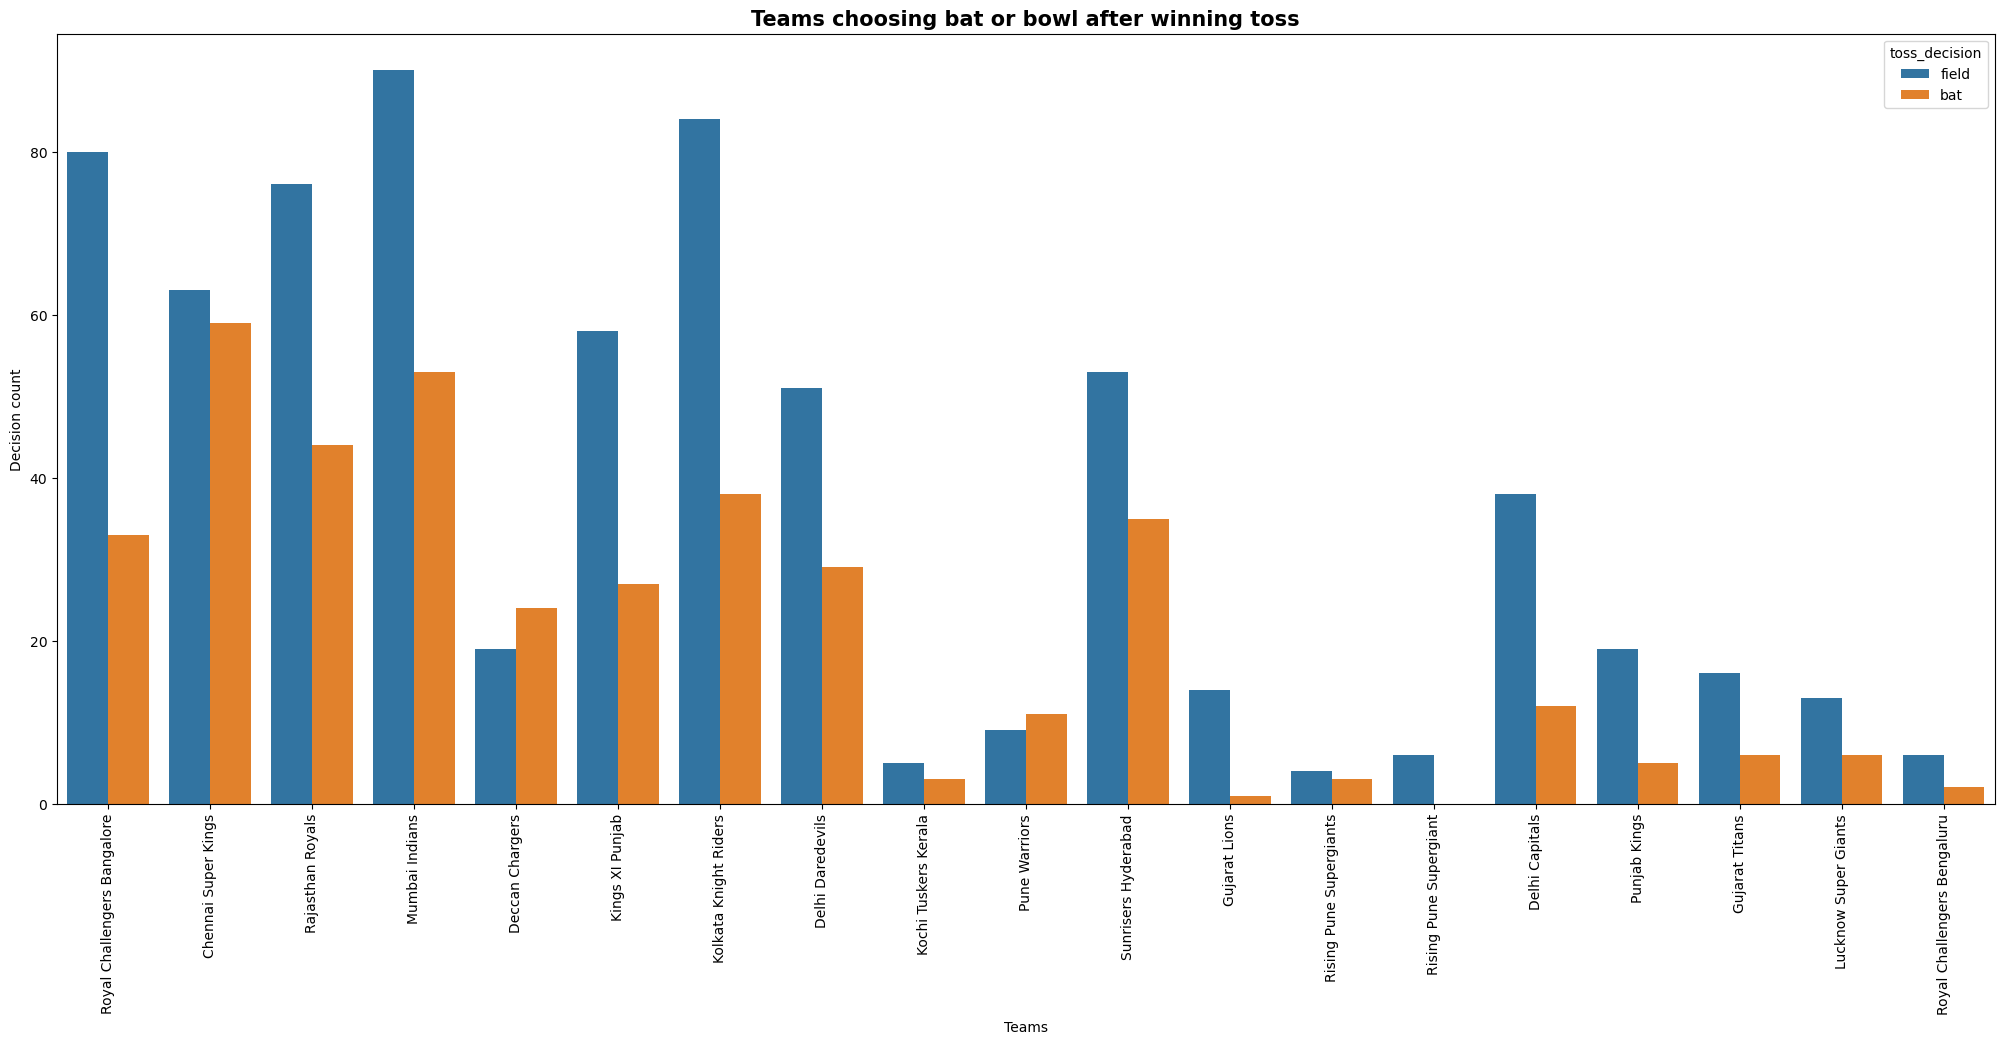

In [42]:
toss = df[['match_id','toss_winner', 'toss_decision']]
filter_match_id(toss)
toss

plt.figure(figsize=(25,10))
sns.countplot(x= 'toss_winner' , data= toss , hue = 'toss_decision')
plt.title('Teams choosing bat or bowl after winning toss' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('Teams' , fontsize = 10)
plt.xticks(rotation = 90)
plt.ylabel('Decision count', fontsize = 10)
plt.show()

- All the teams have chosen to field first on  avg.

**B.1.2 How winning toss help in winning matches.**

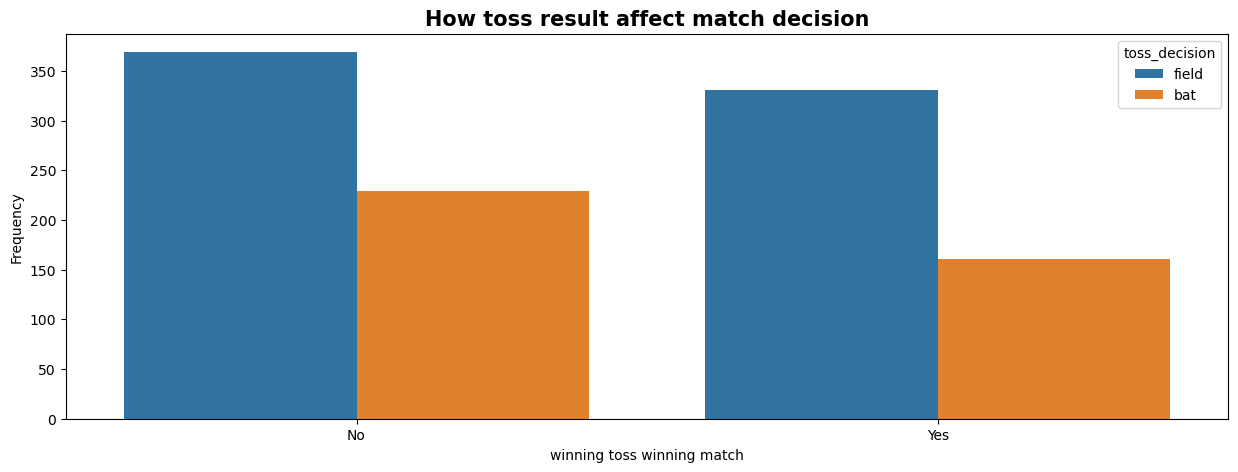

In [43]:
plt.figure(figsize= (15,5))
sns.countplot(x = 'toss_w_match_w' , data = toss_w , hue= 'toss_decision')
plt.title('How toss result affect match decision' , fontsize= 15, fontweight = 'bold')
plt.xlabel('winning toss winning match' , fontsize = 10 )
plt.ylabel('Frequency', fontsize = 10)
plt.show()

- Teams winnning tosses and electing to field first have won most number of times.

In [44]:
pd.crosstab(toss_w.toss_w_match_w, toss_w.toss_decision)

toss_decision,bat,field
toss_w_match_w,,
No,229,369
Yes,161,331


**B.1.3 Does winning toss and electing field win matches consistent over across all venues**

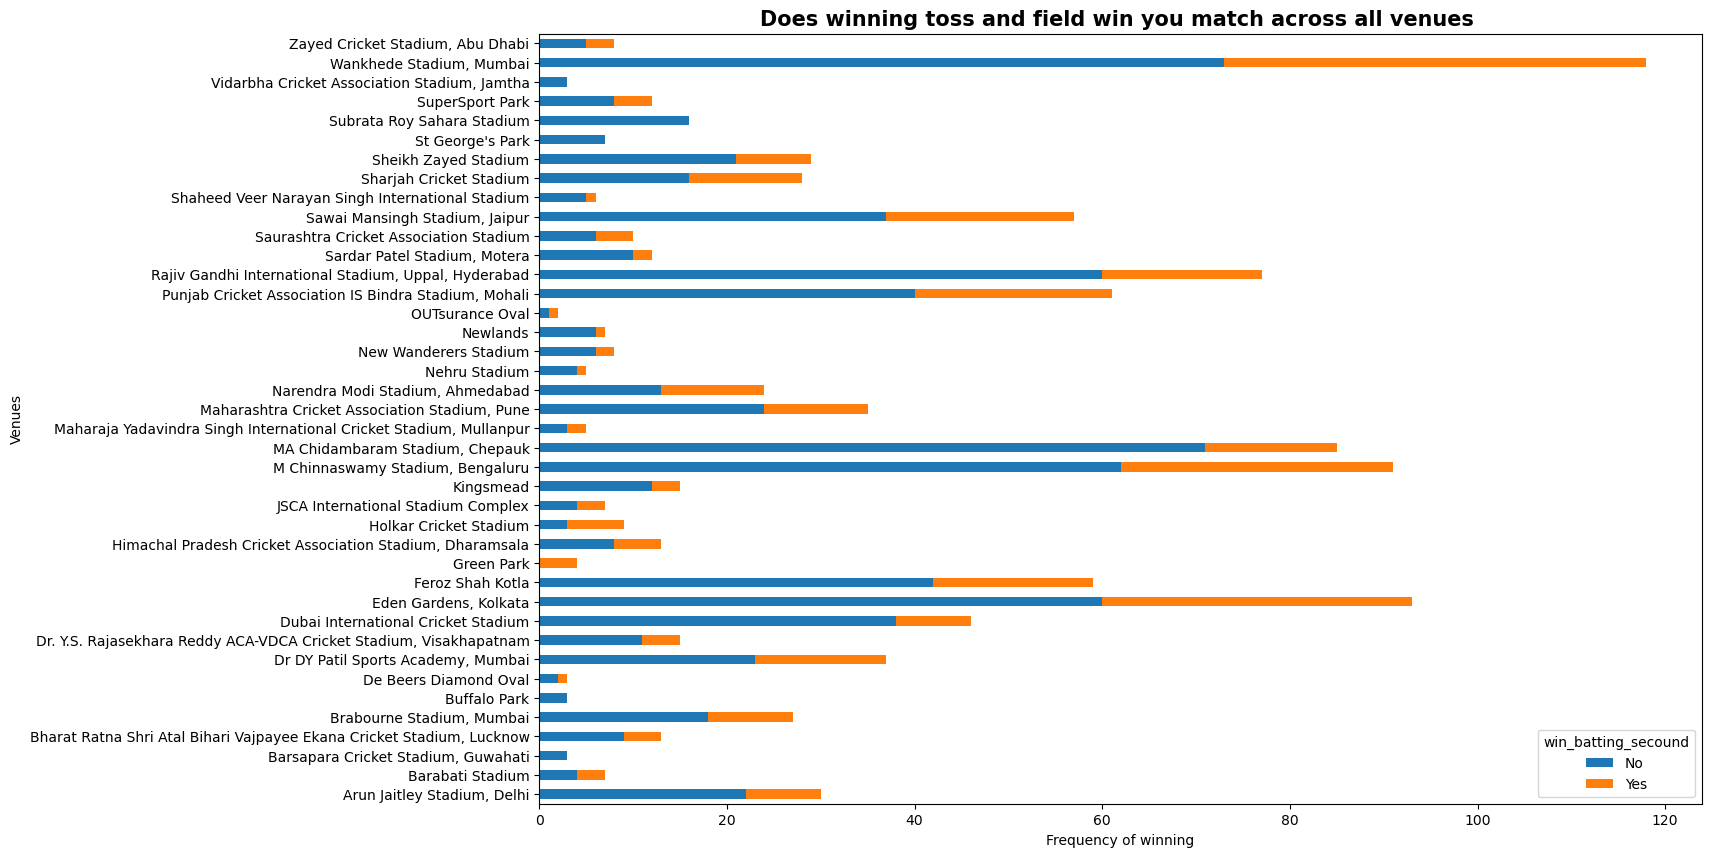

In [45]:
toss_w['win_batting_secound'] = np.where((toss_w['toss_decision']== 'field') & (toss_w['toss_w_match_w']== 'Yes'), 'Yes', 'No')
toss_w.groupby('venue')['win_batting_secound'].value_counts().unstack().plot(kind = 'barh', figsize = (15,10) , stacked='True' )
plt.title('Does winning toss and field win you match across all venues ' , fontsize = 15 , fontweight = 'bold')
plt.xlabel('Frequency of winning' , fontsize = 10)
plt.ylabel('Venues' , fontsize = 10)
plt.show()

- As by above obesrvations we can see that if a team elect to field first it does not provide them advantages across all venues but the ratio is almost same in venues like M Chinnaswamy stadium , holkar cricket stadium and Green Park stadium.

**B.1.4 Does batting secound has been advantageous across all seasons**

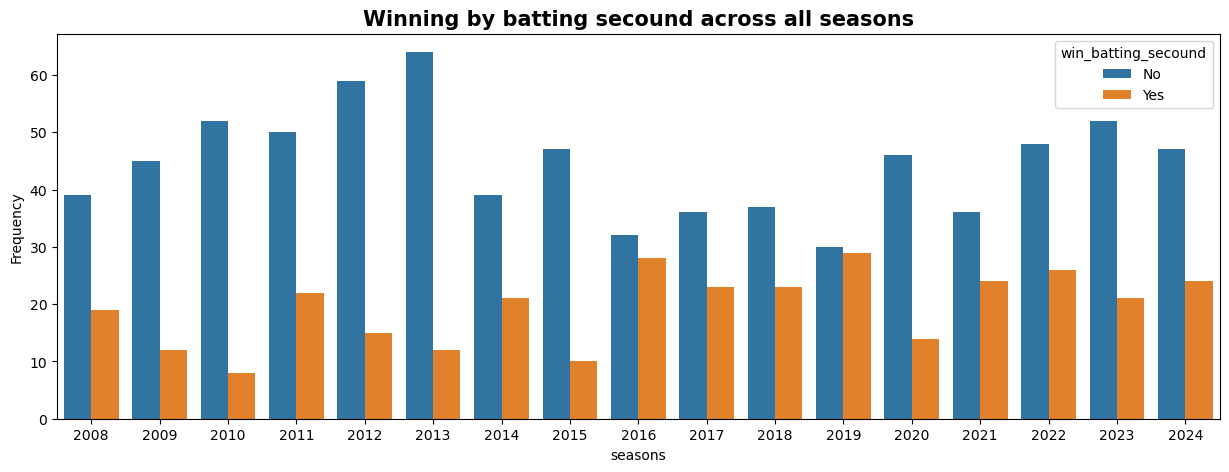

In [46]:
plt.figure(figsize= (15,5))
sns.countplot(x = 'season' , data= toss_w , hue='win_batting_secound')
plt.title('Winning by batting secound across all seasons', fontsize = 15 , fontweight = 'bold')
plt.xlabel('seasons', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

- By looking at the above graphs, 2016 and 2019 are only two seasons where batting secound was more advantageous. 

**B.1.5 Are there any specific veunes where DLS is applied most**

In [47]:
dls = df[['match_id', 'venue', 'method']]
filter_match_id(dls)

fig = px.bar(dls, x='venue', color_discrete_sequence=['purple'],
             title='Venues where DLS is applied most',
             labels={'category': 'Category', 'count': 'Count'})
fig.show()

In [48]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'],
      dtype='object')

**B.1.6 Which team has defended its total more handsomly after winning toss**

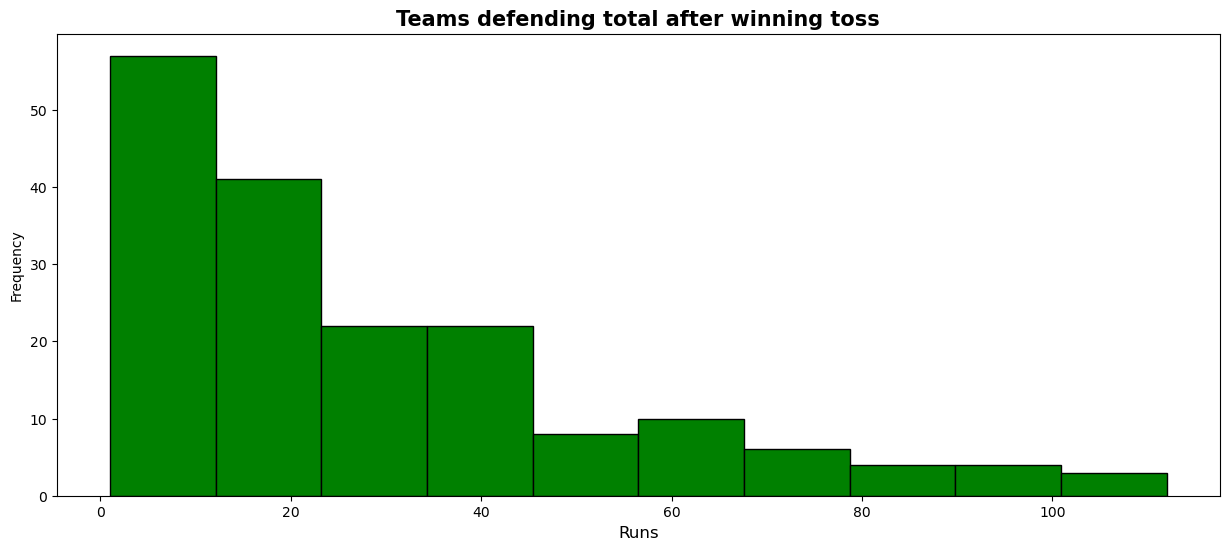

In [49]:
# in order to get this first we have to filter out matches with win_by_runs and then visualize its distrbution for better perspective

defend = df[['match_id', 'toss_decision', 'result', 'result_margin', 'winner', 'toss_winner']]
filter_match_id(defend)
defend['sucess'] = np.where((defend['toss_decision']=='bat') & (defend['result']== 'runs'), 'Yes', 'No')
defend['margin'] = np.where((defend['sucess']=='Yes'), defend['result_margin'], np.nan)
defend

# Here we have found margin of team successfully defending runs by winning toss, now we can visualize its distribution

defend.margin.plot(kind= 'hist' , figsize=(15,6), color = 'green', edgecolor = 'black')
plt.title('Teams defending total after winning toss', fontsize = 15 , fontweight = 'bold')
plt.xlabel('Runs', fontsize = 12)
plt.show()

- For a T20 match , winning by more than 20 runs is quite a big-margin. Based on this we are gooing to see teams which have won by big-margins(more than 45 i guess) after winning toss. 

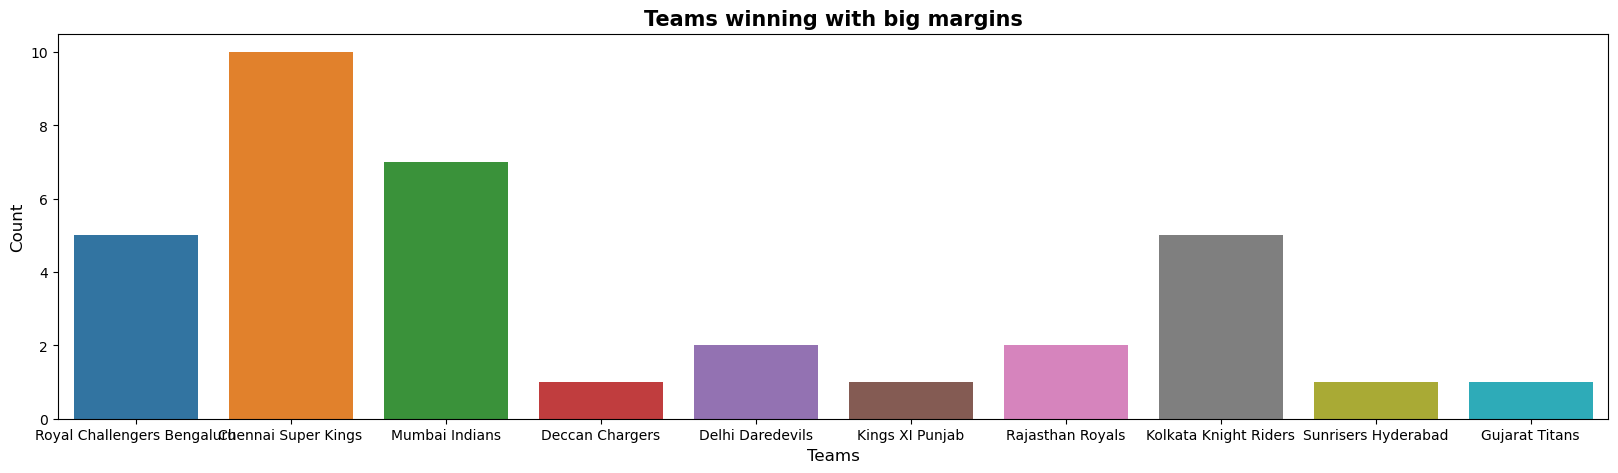

In [50]:
big_run_margin = pd.DataFrame(defend[defend['margin']> 45][['winner', 'toss_winner', 'toss_decision']])
plt.figure(figsize=(20,5))
sns.countplot(x = 'winner' , data= big_run_margin)
plt.title('Teams winning with big margins', fontsize = 15 , fontweight = 'bold')
plt.xlabel('Teams', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

- CSK and MI are 1st and 2nd respectively by defending their total sucessfully by more that 45 runs after winning toss and electing to Bat first.

**B.1.7 Which team has chased down total successfully with good number of wickets in hand**

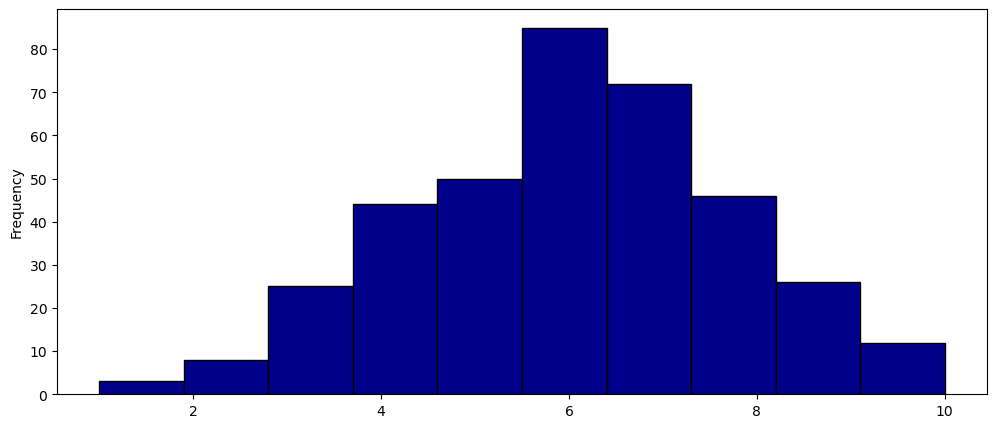

In [51]:
# In order to find this , we will follow same approach ass above 

Chased = df[['match_id', 'toss_decision', 'result', 'result_margin', 'winner', 'toss_winner']]
filter_match_id(Chased)
Chased['wic'] = np.where((Chased['toss_decision']== 'field') & (Chased['result']=='wickets') ,'Yes', np.nan)
Chased['wic'] = np.where(Chased['wic']=='Yes', Chased['result_margin'], np.nan)
Chased.wic.plot(kind='hist', figsize=(12,5), color = 'darkblue', edgecolor = 'black')
plt.show()

- In a T20 match, winning by 6 or more than 6 wickets is quite good we can say.


In [52]:
good_wic = pd.DataFrame(Chased[Chased['wic']>= 6][['winner', 'toss_winner', 'toss_decision']])

fig = px.bar(good_wic, x = 'winner', title= 'Teams winning with good wickets in hand')
fig.show()

- Teams like KKR, RCB & MI have won by more than 6 wickets in hands after choosing to chase down the target many times as compare to other teams.

# Now we will focus on individual players more 

**B.2.1 Run scoring in IPL seasons has this gone up or down ??**

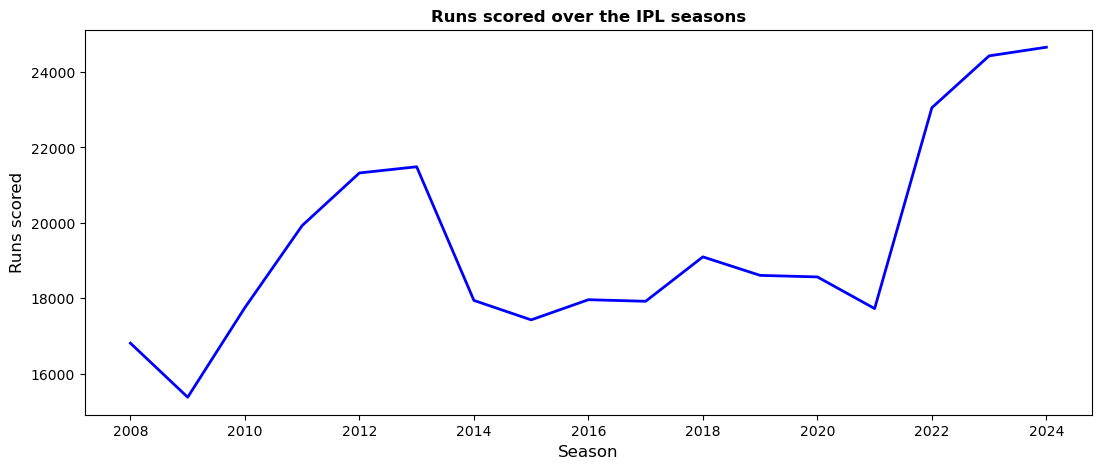

In [53]:
df.groupby('season')['batsman_runs'].sum().plot(kind= 'line', linewidth = 2 , figsize= (13,5), color = 'blue')
plt.title('Runs scored over the IPL seasons', fontsize = 12 , fontweight = 'bold')
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Runs scored', fontsize = 12)
plt.show()

- Trends of scoring more runs is increased in the recent seasons more than 24000 runs were scored in last edition of IPL.

**B.2.2 Are some venues more batter friendly than others??**

In [54]:
venue_list = list(df.venue.unique())
total_runs = {}
total_matches = {}

for i in venue_list :
    total_runs[i] = df[df.venue == i]['batsman_runs'].sum()
    total_matches[i] = df[df.venue == i].nunique()['match_id']

avg_runs = pd.DataFrame({'Runs' : total_runs, 'Matches' : total_matches})
avg_runs['average'] = avg_runs['Runs']/avg_runs['Matches']
avg_runs[avg_runs['Matches']>30].sort_values(by='average', ascending=False).head(10)    

,Runs,Matches,average
"Wankhede Stadium, Mumbai",36919,118,312.872881
"Punjab Cricket Association IS Bindra Stadium, Mohali",18929,61,310.311475
"M Chinnaswamy Stadium, Bengaluru",29075,94,309.308511
"Eden Gardens, Kolkata",28182,93,303.032258
"Maharashtra Cricket Association Stadium, Pune",10600,35,302.857143
"Rajiv Gandhi International Stadium, Uppal, Hyderabad",23158,77,300.753247
Dubai International Cricket Stadium,13753,46,298.978261
"MA Chidambaram Stadium, Chepauk",25295,85,297.588235
"Sawai Mansingh Stadium, Jaipur",16746,57,293.789474
Feroz Shah Kotla,17499,60,291.650000


- Wankhede Stadium, Mumbai can be seen as most batting friendly as its avg. runs in 118 is 312.
- Most number of matches has been played in also wankhede Stadium Mumbai (118) followed by M chinnaswamy Stadium, bengaluru (94)

**B.2.3 Pattern between most runs and batting order ?**

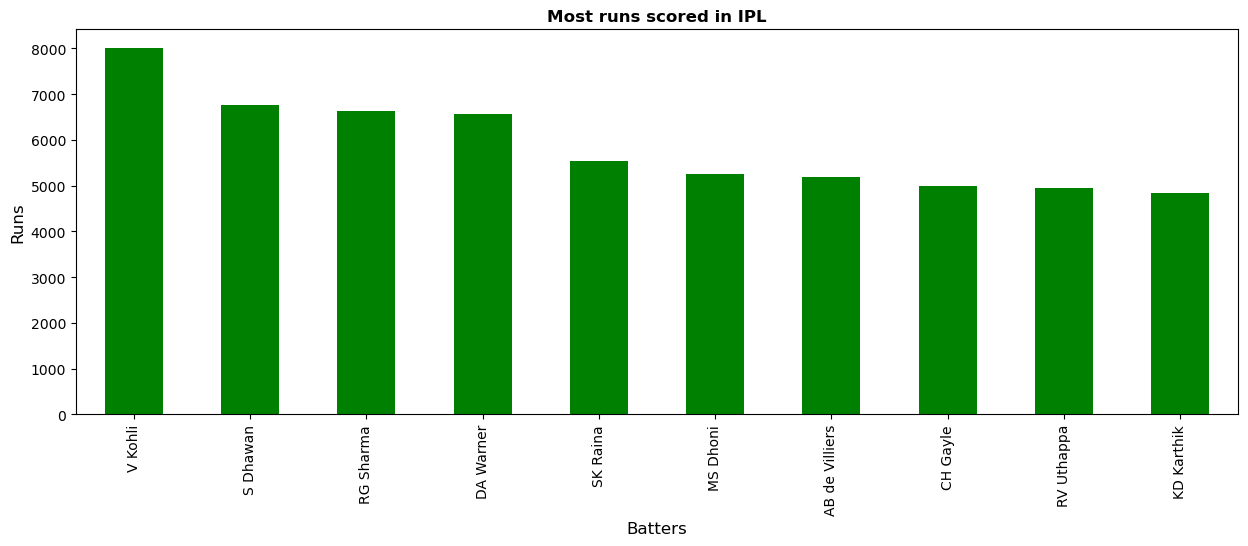

In [55]:
df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind= 'bar' , figsize= (15,5), color ='green')
plt.title('Most runs scored in IPL', fontsize = 12 , fontweight = 'bold')
plt.xlabel('Batters', fontsize = 12)
plt.ylabel('Runs', fontsize= 12)
plt.show()

- Except MS dhoni and D karthik all the batters are top order batters.
- Virat Kohli has scored most runs in ipl so far.

**B.2.4 In batter dominated game lets see which bowler has been successful till now**

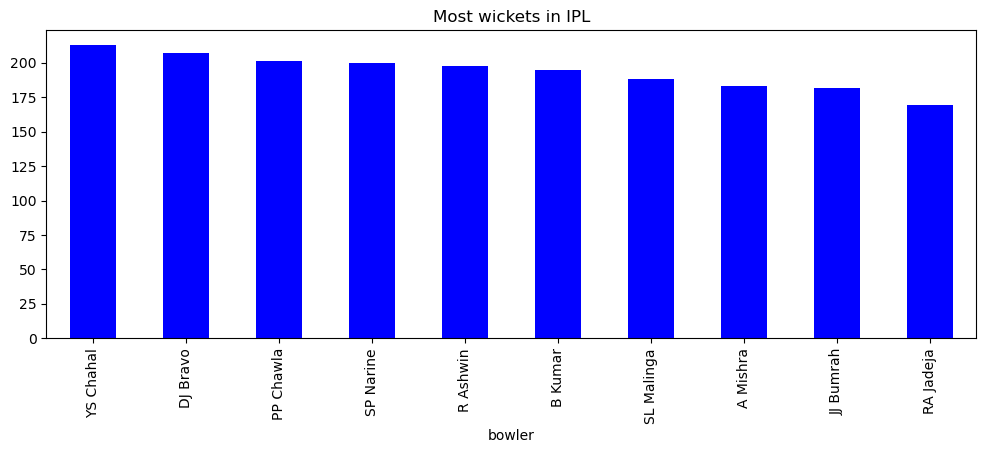

In [56]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,4) , color = 'blue', title= 'Most wickets in IPL')
plt.show()

- YS Chahal has taken most wickets till now followed by Dj Bravo.
- Most bowlers in the leaderboard are spinners.

**B.2.5 Runs scored by all teams across all the seasons of IPL**

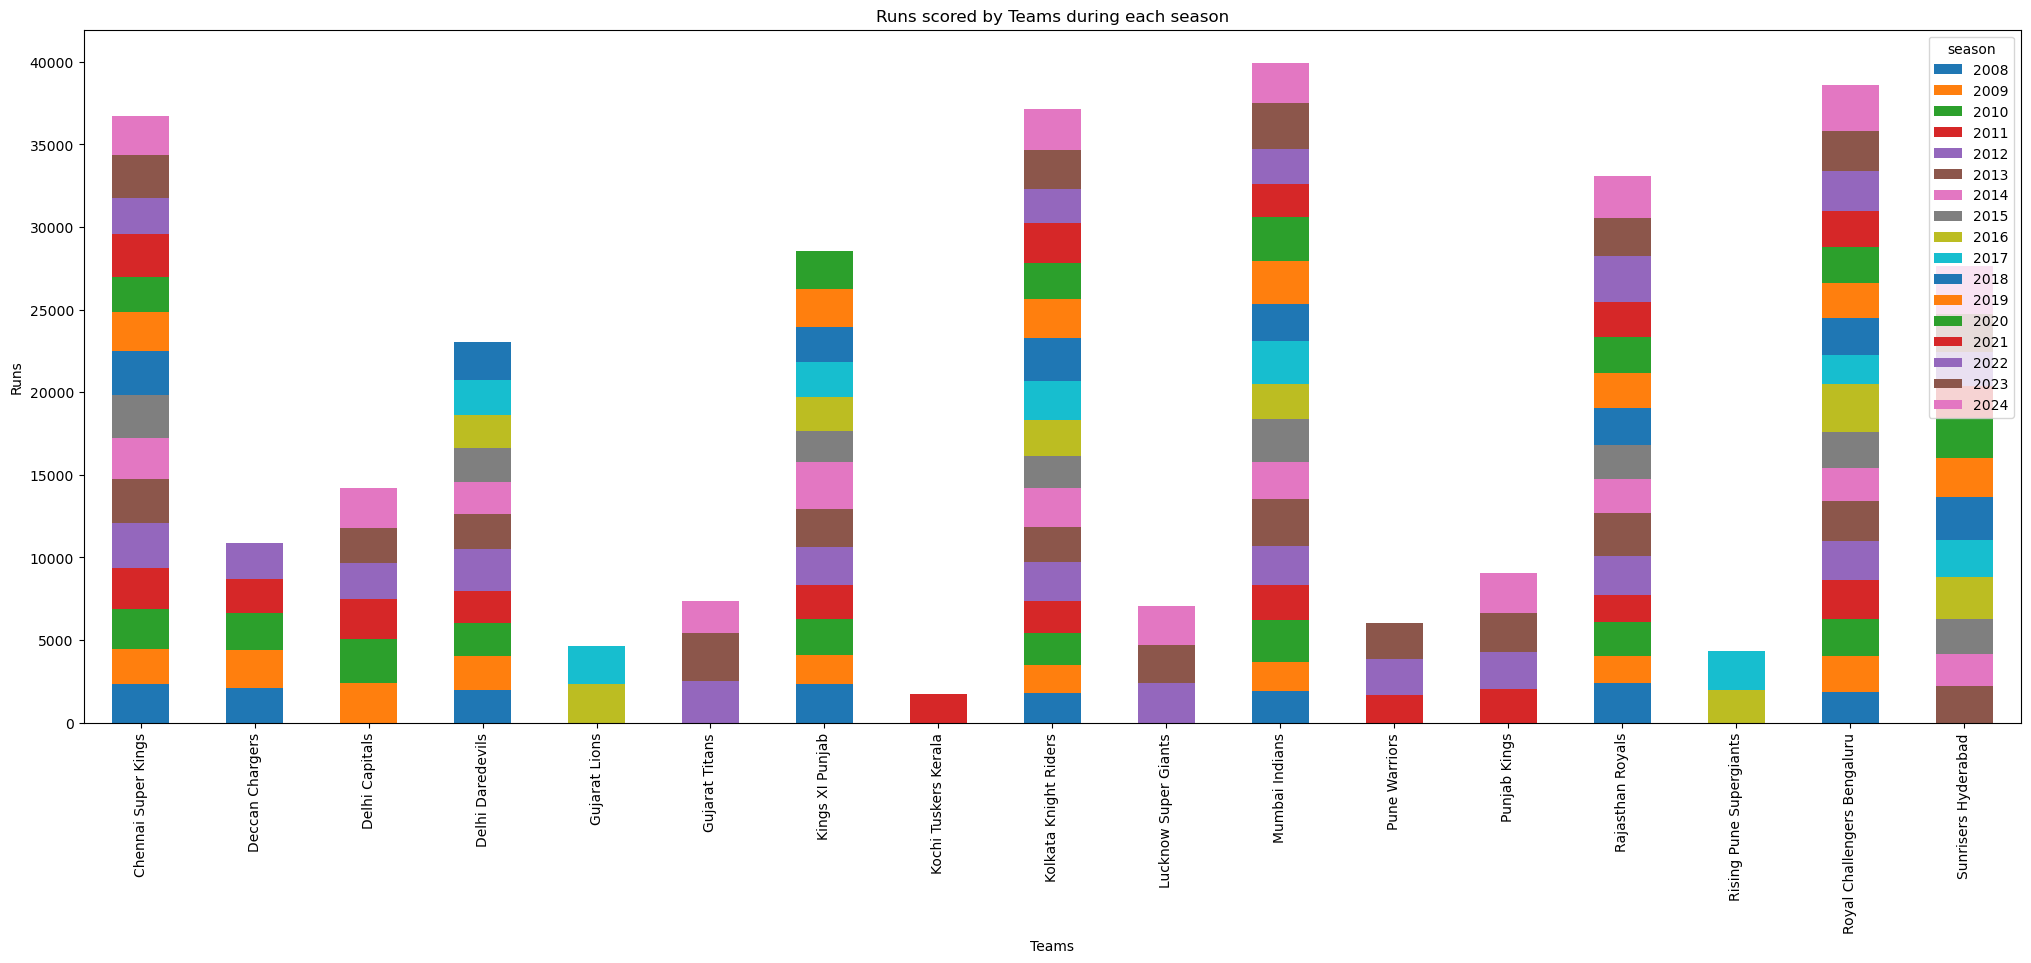

In [57]:
df.groupby(['batting_team', 'season'])['batsman_runs'].sum().unstack().plot(kind= 'bar', stacked=True, figsize = (25, 9
                                                                                                                  ), title= 'Runs scored by Teams during each season')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.show()

- Runs scoring has gone up for all teams each season specially for RCB in last edition of IPL.

**B.2.6 Batter which has been more consistent among top 10 run getters**

## **Time Series Analysis and forecasting** :

**T.1 Finding Seasonality in the time series using a specific Team**

In [58]:
# Here we will find out a team's performance in different whether its gone up or down (in both home games and away games)
# I'll be selecting RCB(mine fav) first
rcb = df[['match_id', 'team1', 'team2', 'season', 'match_type', 'venue', 'winner', 'city']]
rcb = rcb[(rcb['team1'] == 'Royal Challengers Bengaluru') | (rcb['team2'] == 'Royal Challengers Bengaluru')]
filter_match_id(rcb)
rcb.reset_index(drop=True, inplace=True)
rcb['venue'] = np.where(rcb['venue']== 'M Chinnaswamy Stadium, Bengaluru', 'Home', 'Away')
rcb_wins = rcb[rcb['winner']== 'Royal Challengers Bengaluru'].groupby('season')['match_id'].count()
pd.DataFrame(rcb_wins)

,match_id
season,
2008,4
2009,9
2010,8
2011,10
2012,8
2013,9
2014,5
2015,8
2016,9


-WIn rate of Rcb each season

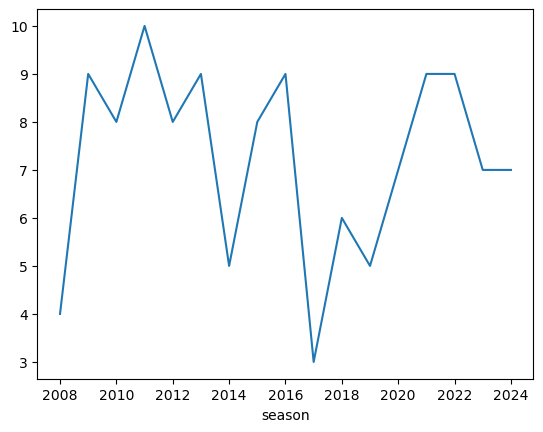

In [59]:
rcb[rcb['winner']== 'Royal Challengers Bengaluru'].groupby('season')['match_id'].count().plot(kind='line')
plt.show()

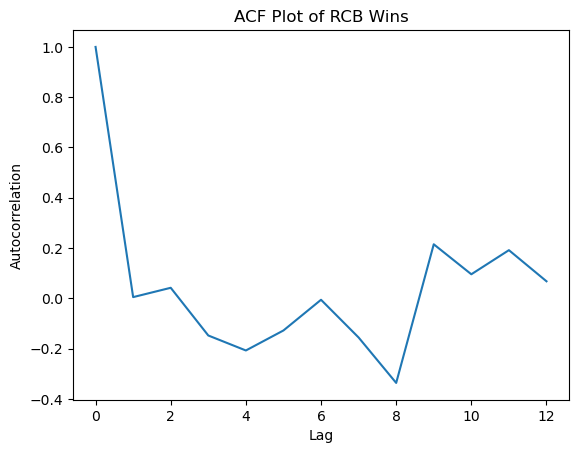

In [60]:
import statsmodels.api as sm
acf = sm.tsa.acf(rcb_wins)
plt.plot(acf)
plt.title('ACF Plot of RCB Wins')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [61]:
# Now we will try to find out run rate of RCB per match each season does it follow some seasonal patterns or not

rcb

,match_id,team1,team2,season,match_type,venue,winner,city
0,335982.0,Royal Challengers Bengaluru,Kolkata Knight Riders,2008,League,Home,Kolkata Knight Riders,Bengaluru
1,335985.0,Mumbai Indians,Royal Challengers Bengaluru,2008,League,Away,Royal Challengers Bengaluru,Mumbai
2,335992.0,Royal Challengers Bengaluru,Rajasthan Royals,2008,League,Home,Rajasthan Royals,Bengaluru
3,335996.0,Royal Challengers Bengaluru,Chennai Super Kings,2008,League,Home,Chennai Super Kings,Bengaluru
4,335998.0,Delhi Daredevils,Royal Challengers Bengaluru,2008,League,Away,Delhi Daredevils,Delhi
...,...,...,...,...,...,...,...,...
247,1426290.0,Gujarat Titans,Royal Challengers Bengaluru,2024,League,Home,Royal Challengers Bengaluru,Bengaluru
248,1426296.0,Royal Challengers Bengaluru,Punjab Kings,2024,League,Away,Royal Challengers Bengaluru,Dharamsala
249,1426300.0,Royal Challengers Bengaluru,Delhi Capitals,2024,League,Home,Royal Challengers Bengaluru,Bengaluru
250,1426306.0,Royal Challengers Bengaluru,Chennai Super Kings,2024,League,Home,Royal Challengers Bengaluru,Bengaluru


In [62]:
rcb_runs = df[['match_id', 'batting_team', 'total_runs', 'season', 'winner' ]]
run = rcb_runs.groupby('match_id')['total_runs'].sum()
rcb_runs = rcb_runs[rcb_runs['batting_team']== 'Royal Challengers Bengaluru']
rcb_runs = rcb_runs.groupby(['match_id', 'season'])['total_runs'].sum()
rcb_runs = rcb_runs.reset_index()
rcb_runs

,match_id,season,total_runs
0,335982,2008,82
1,335985,2008,166
2,335992,2008,135
3,335996,2008,165
4,335998,2008,181
...,...,...,...
250,1426290,2024,152
251,1426296,2024,241
252,1426300,2024,187
253,1426306,2024,218


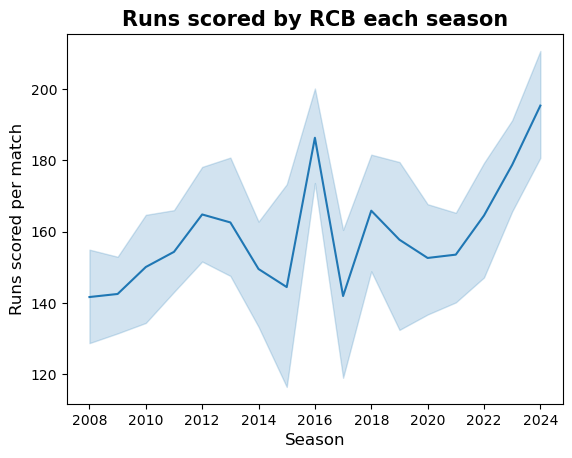

In [63]:
sns.lineplot(x = rcb_runs['season'], y = rcb_runs['total_runs'])
plt.title('Runs scored by RCB each season', fontsize = 15 , fontweight = 'bold')
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Runs scored per match', fontsize = 12)
plt.show()

In [64]:
avg_runs_season = rcb_runs.groupby('season')['total_runs'].mean()
avg_runs_season

season
2008    141.642857
2009    142.500000
2010    150.062500
2011    154.312500
2012    164.800000
2013    162.562500
2014    149.500000
2015    144.437500
2016    186.312500
2017    141.923077
2018    165.857143
2019    157.714286
2020    152.600000
2021    153.533333
2022    164.500000
2023    178.714286
2024    195.333333
Name: total_runs, dtype: float64

- In Conclusion we can say that during the seasons of 2008 - 2013 there was constant improvement in RCB's batting but the average dropped down again from season 2014 - 2015.
- So, RCB seems to have a pattern in their batting average as their avg. improves in couple of seasons and after one good season avg. again drops.
- In 2024, RCB have achived their highest batting average (195.3 rpm) 

**T.2 To find other teams Seasonality during all the seasons we can create a function.**

In [65]:
def teams_perf (df, team_name):
    # Filter the dataframe to get the team's performance
    team_runs = df[['match_id', 'batting_team', 'total_runs', 'season', 'winner']]
    team_runs = team_runs[team_runs['batting_team']== team_name]
    team_runs = team_runs.groupby(['match_id', 'season'])['total_runs'].sum()
    team_runs = team_runs.reset_index()

    #calculate the average runs per season 
    avg_run_per_season = team_runs.groupby('season')['total_runs'].mean()

    #Highest score for the team 
    highest_Runs = team_runs['total_runs'].max()
    
    return team_runs , avg_run_per_season, highest_Runs
    

In [66]:
mi_runs, mi_run_per_season, mi_highest = teams_perf(df, 'Mumbai Indians')
csk_runs, csk_avg, csk_highes = teams_perf(df, 'Chennai Super Kings')
rr_runs, rr_avg, rr_highes = teams_perf(df, 'Rajasthan Royals')

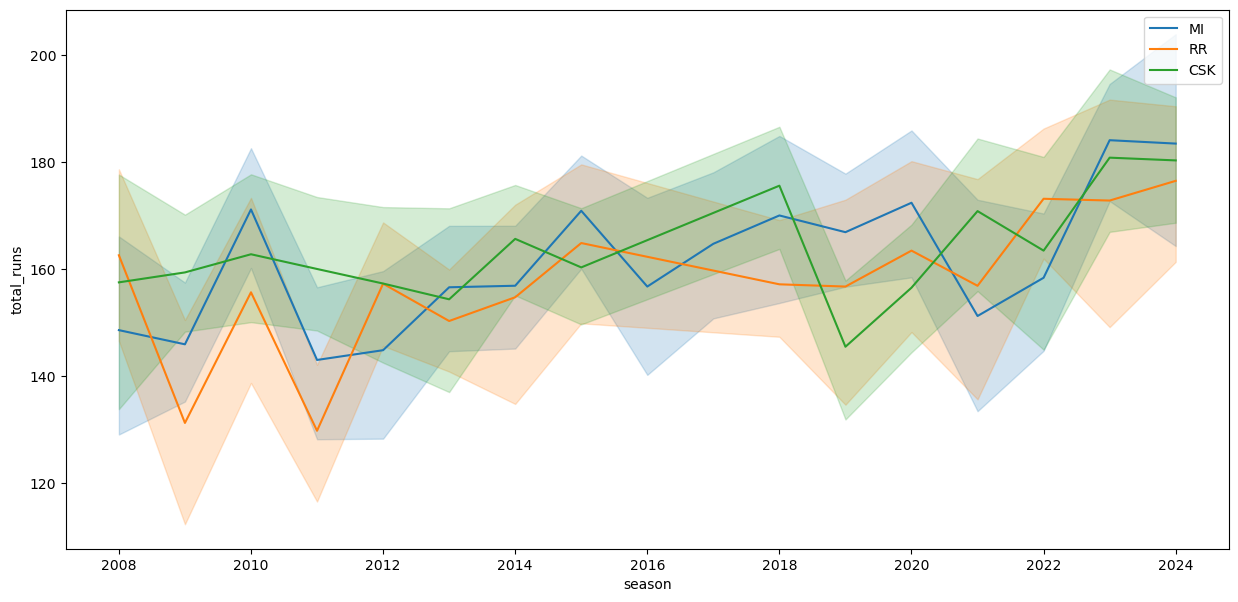

In [67]:
# Now visualizing  the results to find trends or patterns 
plt.figure(figsize=(15,7))
sns.lineplot(x = 'season', y = 'total_runs', label = 'MI', data= mi_runs)
sns.lineplot(x = 'season', y = 'total_runs', label= 'RR', data = rr_runs)
sns.lineplot(x= 'season', y = 'total_runs', label = 'CSK', data= csk_runs)
plt.show()

# Conclusion : 
- CSK has been very consistent with their batting avg. in early seasons but after 2018 their was a sudden drop in the avg.(145.4).
- For CSK the batting avg. during last two seasons is same (180) which means they have batted quite aggressively.
- If we talk about RR, their avg. has seen a W like pattern in early days but they have been consistent during seasons 2012-2021.
- RR's avg. is also increasing with every season. in last season they were batting with a avg. of 176.4
- MI has seen highs and lows each season they have not been consistent with their avg. 
- MI is following a pattern where after 2/3 seasons their avg. goes up but comes down again next season.
- Last 2 seasons has been very successful for MI as they are consistent with an avg. of 183.4


**T.3 Bowling performance of teams based on each season.**

In [68]:
def bowling_perf (df, team_name):

    team_wic = df[['match_id', 'bowling_team', 'is_wicket', 'season']]
    team_wic = team_wic[team_wic['bowling_team']== team_name]
    team_wic = team_wic.groupby(['match_id', 'season'])['is_wicket'].sum()
    team_wic = team_wic.reset_index()

    # Average wickets per season for the team
    avg_wic_season = team_wic.groupby('season')['is_wicket'].mean()

    return team_wic, avg_wic_season

In [69]:
csk_wic, csk_wic_avg = bowling_perf(df, 'Chennai Super Kings')
rcb_wic, rcb_wic_avg = bowling_perf(df, 'Royal Challengers Bengaluru')
kkr_wic, kkr_wic_avg = bowling_perf(df, 'Kolkata Knight Riders')

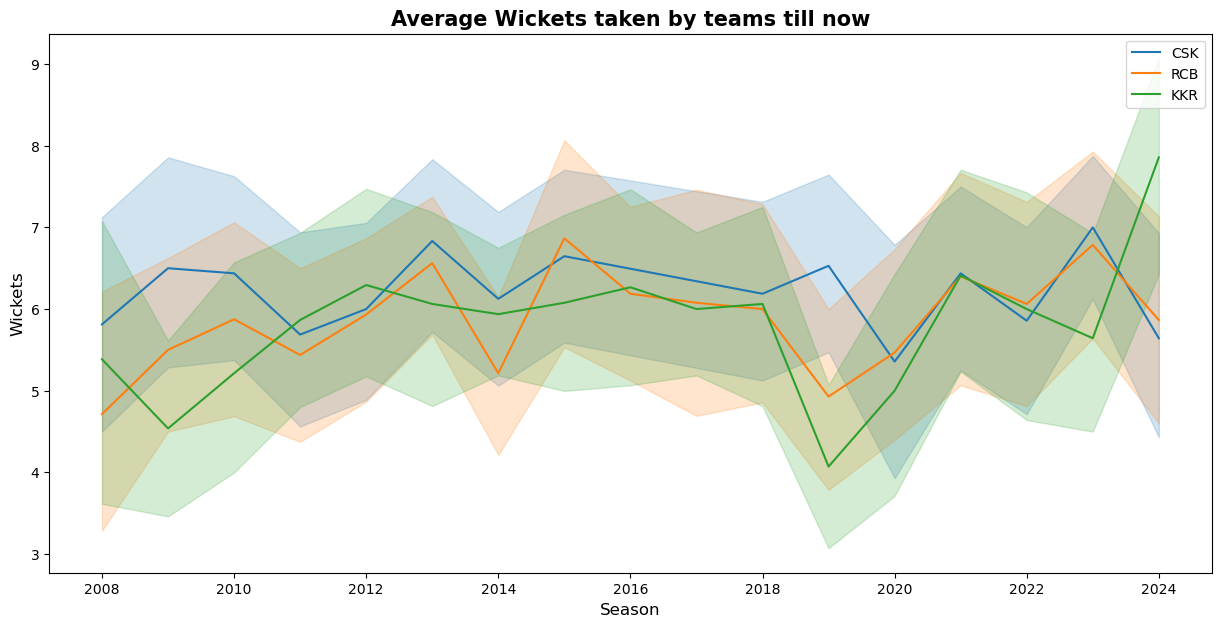

In [70]:
plt.figure(figsize=(15,7))
sns.lineplot(x ='season', y = 'is_wicket', data= csk_wic, label = 'CSK')
sns.lineplot(x ='season', y = 'is_wicket', data= rcb_wic, label = 'RCB')
sns.lineplot(x ='season', y = 'is_wicket', data= kkr_wic, label = 'KKR')
plt.title('Average Wickets taken by teams till now', fontsize = 15 , fontweight = 'bold')
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Wickets', fontsize = 12)
plt.show()


# Conclusions : 
- In case of CSK , Teams wicket taking ability per season has been same , it does not sees any ups and downs till 2021.
- After 2022, CSK's performance is decreased with an avg. of 5.8.
- In 2023, CSK seen their best bowling avg. till now 7.0 but it again fell down in last edition with an avg. of 5.6
- CSK's highest bowling avg. is 7.0 and their lowest is 5.3 till now.

- RCB has always been a weaker side in terms of bowling, as their bowling avg. has never exceeds more than 6.8
- RCB bowling has also seen some highs and lows, as highest till now is 6.8 and lowest is 4.7
- RCB's bowling is always inconsistent, In last 4 seasons their bownling avg. is following a **W** pattern.
- We can conclude that the reason of RCB's failure in IPL could be their weak bowling.

- KKR's wicket taking ability has been consistent during 2012-2018 ranging between 5.9 - 6.2
- During these seasons KKR has won 2 IPL titles.
- In 2024 , KKR's bownling has seen their highest till now 7.8 wpm which helped them to win their 3rd IPL championship.
- In KKR's performance bowling has played a very crucial role.

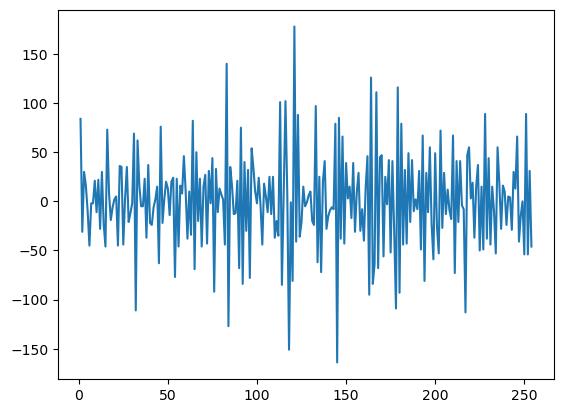

ADF Test Results (Differenced Dataset):
Test Statistic: -7.350036862783661
p-value: 1.0116272871140561e-10
Used lag: 16
Number of observations used: 237
Critical values: {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}


In [98]:
import statsmodels.tsa.stattools as ts 
series = rcb_runs['total_runs']
rcb_runs_diff = rcb_runs['total_runs'].diff()
plt.plot(rcb_runs_diff)
plt.show()

adf_test_diff = ts.adfuller(rcb_runs_diff.dropna())

# Interpret the results
print('ADF Test Results (Differenced Dataset):')
print(f'Test Statistic: {adf_test_diff[0]}')
print(f'p-value: {adf_test_diff[1]}')
print(f'Used lag: {adf_test_diff[2]}')
print(f'Number of observations used: {adf_test_diff[3]}')
print(f'Critical values: {adf_test_diff[4]}')

**T.4 Performance of Virat kohli each season**

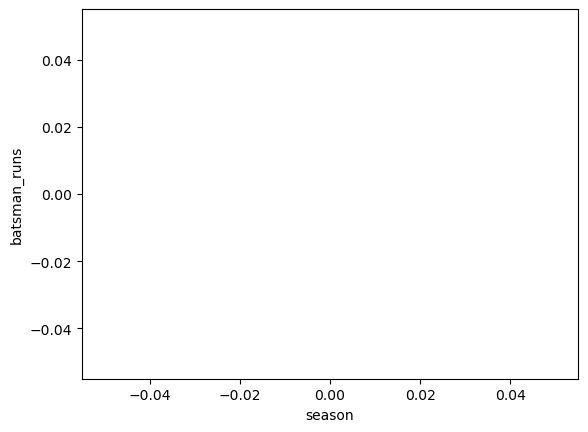

In [94]:
vk = df[['match_id', 'batter', 'batsman_runs','venue','season','match_type']]
vk = vk[vk['batter']== 'V Kohli']
vk.groupby(['match_id', 'season'])['batsman_runs'].sum()
sns.lineplot(x= vk['season'], y= vk.groupby('match_id')['batsman_runs'].sum(), data= vk)
plt.show()

In [84]:
df.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha